In [1]:
#import necesary packages to run stats analyses on the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# Non-norm dataset


In [12]:
#open data
df = pd.read_csv('../../data/all_participants_merged_correct.csv')
#df_norm = pd.read_csv('../../data/pair_features_overlap_high_discomfort_10hz_normalized.csv')
#get columns
cols = df.columns
#print(cols)
#get features, anything from column 4 to the end
features = cols[4:]
#features = [f for f in features if 'r' in f]~
#remove features that have x, y or z but don't have the word "delta"
print(features)
print(len(features))
classes = cols[2]
participant_col = cols[0]

#we can do all, or participant by participan

Index(['nose_x_delta', 'nose_y_delta', 'neck_x_delta', 'neck_y_delta',
       'rightshoulder_x_delta', 'rightshoulder_y_delta', 'rightelbow_x_delta',
       'rightelbow_y_delta', 'rightwrist_x_delta', 'rightwrist_y_delta',
       'leftshoulder_x_delta', 'leftshoulder_y_delta', 'leftelbow_x_delta',
       'leftelbow_y_delta', 'leftwrist_x_delta', 'leftwrist_y_delta',
       'righteye_x_delta', 'righteye_y_delta', 'lefteye_x_delta',
       'lefteye_y_delta', 'rightear_x_delta', 'rightear_y_delta',
       'leftear_x_delta', 'leftear_y_delta', ' AU01_r', ' AU02_r', ' AU04_r',
       ' AU05_r', ' AU06_r', ' AU07_r', ' AU09_r', ' AU10_r', ' AU12_r',
       ' AU14_r', ' AU15_r', ' AU17_r', ' AU20_r', ' AU23_r', ' AU25_r',
       ' AU26_r', ' AU45_r', ' AU01_c', ' AU02_c', ' AU04_c', ' AU05_c',
       ' AU06_c', ' AU07_c', ' AU09_c', ' AU10_c', ' AU12_c', ' AU14_c',
       ' AU15_c', ' AU17_c', ' AU20_c', ' AU23_c', ' AU25_c', ' AU26_c',
       ' AU28_c', ' AU45_c', 'Loudness_sma3', 'alphaRati

In [13]:
#check each feature for normality
for feature in features:
    print('-----------------------------------')
    print(feature)
    #get the data
    data = df[feature]
    #check for normality
    k2, p = stats.shapiro(data)
    alpha = 0.5
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    #plot the data
    #sns.histplot(data, kde=True)
    #plt.show()


-----------------------------------
nose_x_delta
p = 3.0406e-145
The null hypothesis can be rejected
-----------------------------------
nose_y_delta
p = 4.37251e-142
The null hypothesis can be rejected
-----------------------------------
neck_x_delta
p = 9.54057e-146
The null hypothesis can be rejected
-----------------------------------
neck_y_delta
p = 2.43352e-145
The null hypothesis can be rejected
-----------------------------------
rightshoulder_x_delta
p = 1.61499e-145
The null hypothesis can be rejected
-----------------------------------
rightshoulder_y_delta
p = 1.38791e-144
The null hypothesis can be rejected
-----------------------------------
rightelbow_x_delta
p = 8.97062e-142
The null hypothesis can be rejected
-----------------------------------
rightelbow_y_delta
p = 1.88105e-141
The null hypothesis can be rejected
-----------------------------------
rightwrist_x_delta
p = 8.01783e-138
The null hypothesis can be rejected
-----------------------------------
rightwrist_

/tmp/ipykernel_100942/3853402446.py:8: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 28611.
  k2, p = stats.shapiro(data)


In [14]:
#now, assuming normality, do welsh t-test for each feature. save p values in database. then correct using bonferroni
p_values = {}
for feature in features:
    #print('-----------------------------------')
    #print(feature)
    #get the data
    data = df[feature]
    #get the classes
    classes = df['binary_label']
    data_0 = data[classes==0]
    data_1 = data[classes==1]
    #do the t-test
    t, p = stats.ttest_ind(data_0,data_1, equal_var=False)
    #print("p = {:g}".format(p))
    p_values[feature] = p

#correct p values
p_values_corrected = {}
for feature in p_values:
    p_values_corrected[feature] = p_values[feature] * len(p_values)

print(p_values_corrected)


sign_features = []
p_vals = []
for feature in p_values_corrected:
    print('-----------------------------------')
    print(feature)
    print(p_values_corrected[feature])
    if p_values_corrected[feature] < 0.05:
        print('Significant')
        sign_features.append(feature)
        p_vals.append(p_values_corrected[feature])
    else:
        print('Not significant')
    
print(sign_features)
print(len(sign_features))

{'nose_x_delta': 78.86904402185978, 'nose_y_delta': 17.71727989782636, 'neck_x_delta': 76.31347832095084, 'neck_y_delta': 79.4487094302174, 'rightshoulder_x_delta': 57.20072312846353, 'rightshoulder_y_delta': 52.68048298765702, 'rightelbow_x_delta': 82.07773163397148, 'rightelbow_y_delta': 77.38207005671988, 'rightwrist_x_delta': 82.60402644767379, 'rightwrist_y_delta': 83.65696536246716, 'leftshoulder_x_delta': 80.28728005346821, 'leftshoulder_y_delta': 73.6797591406519, 'leftelbow_x_delta': 66.6311637821353, 'leftelbow_y_delta': 65.21754035512897, 'leftwrist_x_delta': 61.373064715135435, 'leftwrist_y_delta': 63.91442276581207, 'righteye_x_delta': 80.93403556645626, 'righteye_y_delta': 40.735679496148336, 'lefteye_x_delta': 78.16189582098846, 'lefteye_y_delta': 29.47725686899896, 'rightear_x_delta': 79.27386879876057, 'rightear_y_delta': 79.42826223919974, 'leftear_x_delta': 64.94058085521951, 'leftear_y_delta': 70.05708196973248, ' AU01_r': 0.043690354162643164, ' AU02_r': 3.81233014

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn


def run_multiclass_nonparametric_analysis(df, features):
    # Dictionary to store results
    results = {
        'kruskal_p_values': {},
        'significant_features': [],
        'post_hoc_results': {}
    }
    
    # Perform Kruskal-Wallis H-test for each feature
    for feature in features:
        # Group the data by class
        groups = [group[feature].values for name, group in df.groupby('binary_label')]
        
        # Perform Kruskal-Wallis H-test
        h_statistic, p_value = stats.kruskal(*groups)
        
        # Store Kruskal-Wallis p-value
        results['kruskal_p_values'][feature] = p_value
        
        # Check significance after Bonferroni correction
        corrected_p_value = p_value * len(features)
        
        if corrected_p_value < 0.05:
            results['significant_features'].append(feature)
            
            # Perform Dunn's test for post-hoc pairwise comparisons
            #dunn_results = posthoc_dunn(
            #    df, 
            #    val_col=feature, 
            #    group_col='multiclass_label', 
            #    p_adjust='bonferroni'
            #)
            #results['post_hoc_results'][feature] = dunn_results
    
    return results

# Usage
# Assuming you have already prepared your DataFrame
results = run_multiclass_nonparametric_analysis(df, features)

# Print results
print("Kruskal-Wallis p-values:")
for feature, p_value in results['kruskal_p_values'].items():
    print(f"{feature}: {p_value}")

print("\nSignificant Features:")
print(results['significant_features'])
print(len(results['significant_features']))

#print("\nPost-hoc Test Results for Significant Features:")
#for feature, dunn_result in results['post_hoc_results'].items():
#    print(f"\n{feature} Dunn's Test:")
#    print(dunn_result)

Kruskal-Wallis p-values:
nose_x_delta: 0.43543153264059575
nose_y_delta: 0.00458788464373822
neck_x_delta: 0.021180346130314377
neck_y_delta: 0.5621055013512208
rightshoulder_x_delta: 0.051601465968007104
rightshoulder_y_delta: 0.22604170438399768
rightelbow_x_delta: 0.6249158433675682
rightelbow_y_delta: 0.33831102932635915
rightwrist_x_delta: 0.7312330627821527
rightwrist_y_delta: 0.3707344176144063
leftshoulder_x_delta: 0.26334586014942896
leftshoulder_y_delta: 0.4132165952503606
leftelbow_x_delta: 0.3700941124714736
leftelbow_y_delta: 0.5253999355200756
leftwrist_x_delta: 0.07560979209652997
leftwrist_y_delta: 0.87402550623718
righteye_x_delta: 0.2322971606517355
righteye_y_delta: 0.2230311273186375
lefteye_x_delta: 0.7573694529218782
lefteye_y_delta: 0.03592158886142194
rightear_x_delta: 0.19809339043626248
rightear_y_delta: 0.40727526488517163
leftear_x_delta: 0.24518631533571172
leftear_y_delta: 0.8128981754446899
 AU01_r: 0.25737290966826437
 AU02_r: 6.43598354236211e-102
 AU04

-----------------------------------
 AU01_r


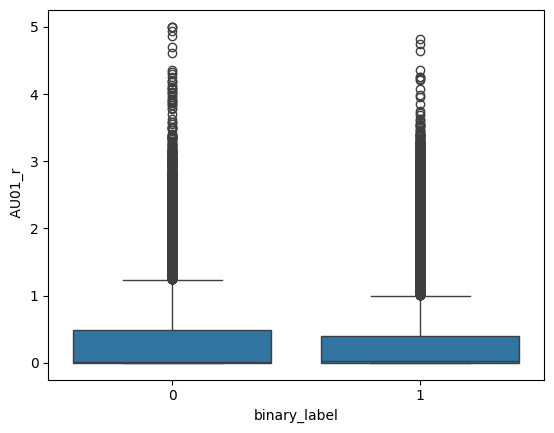

-----------------------------------
 AU02_r


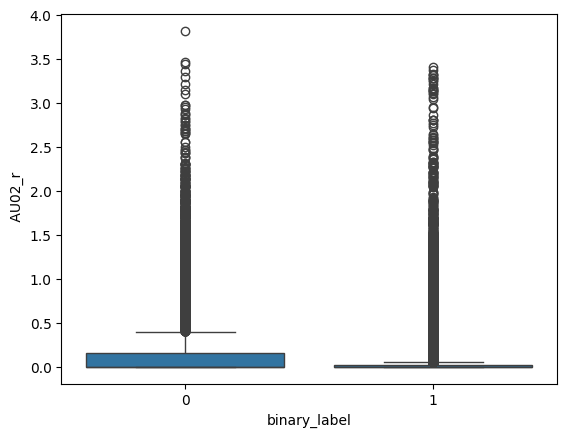

-----------------------------------
 AU04_r


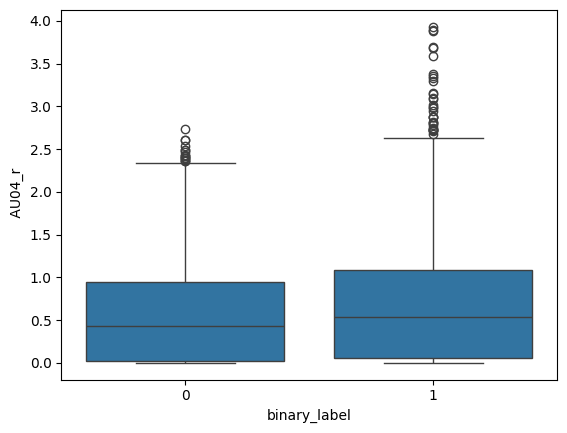

-----------------------------------
 AU05_r


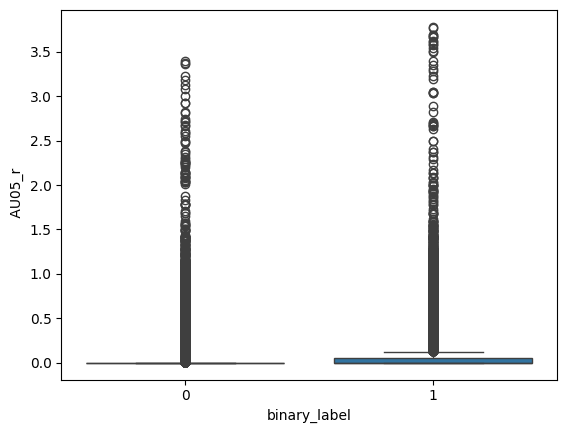

-----------------------------------
 AU06_r


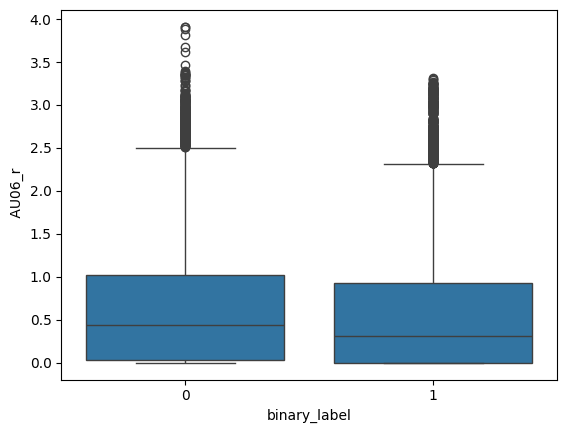

-----------------------------------
 AU09_r


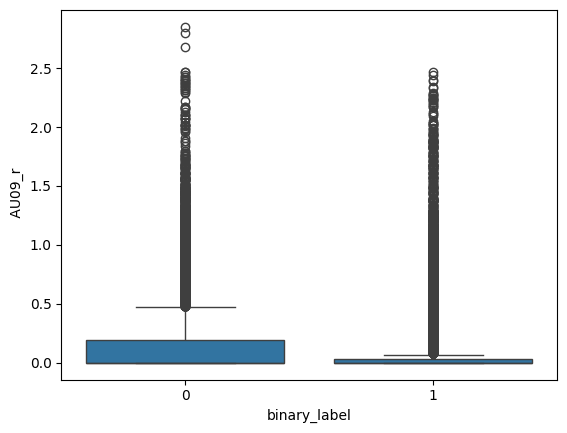

-----------------------------------
 AU10_r


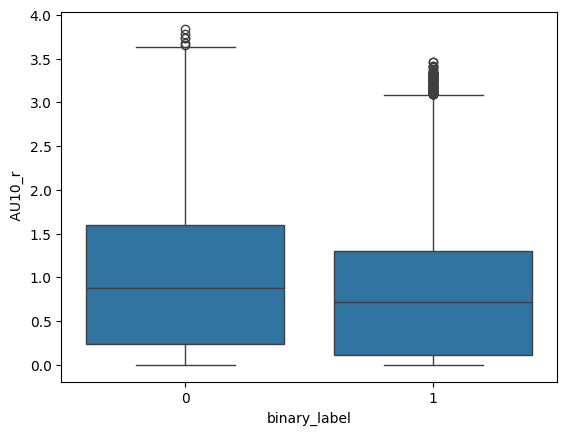

-----------------------------------
 AU14_r


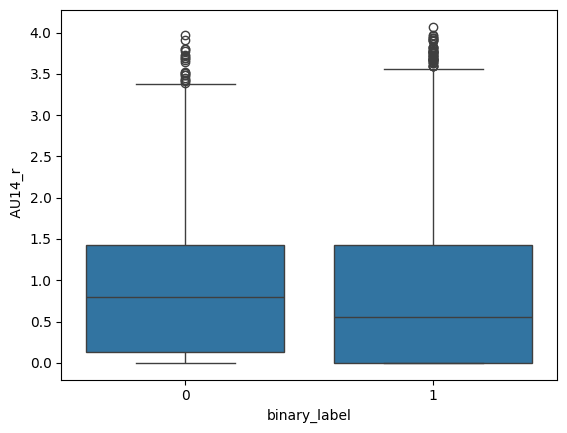

-----------------------------------
 AU15_r


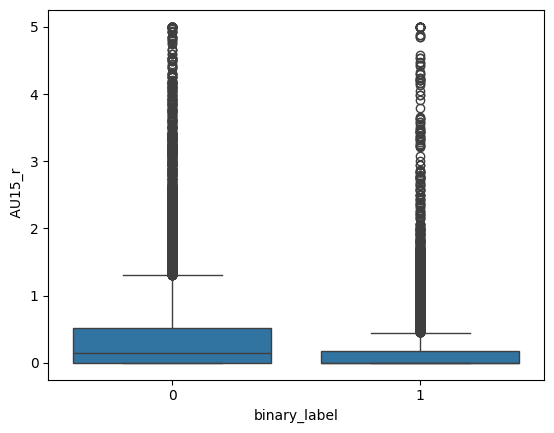

-----------------------------------
 AU20_r


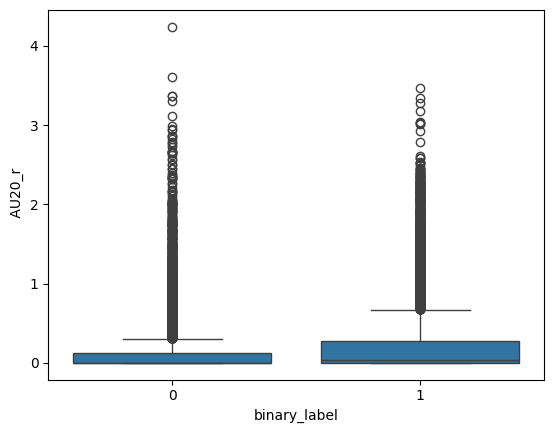

-----------------------------------
 AU23_r


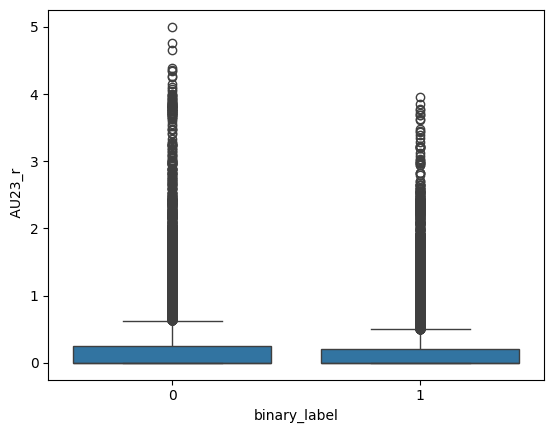

-----------------------------------
 AU25_r


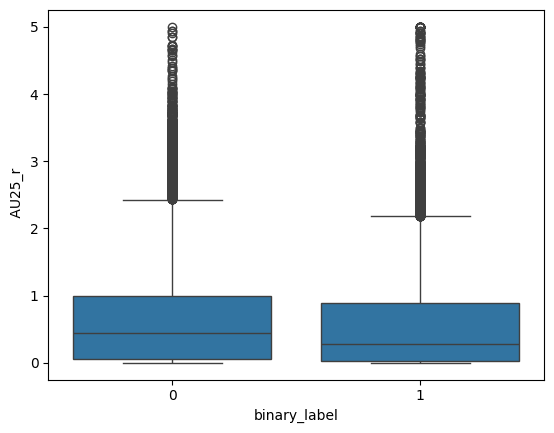

-----------------------------------
 AU26_r


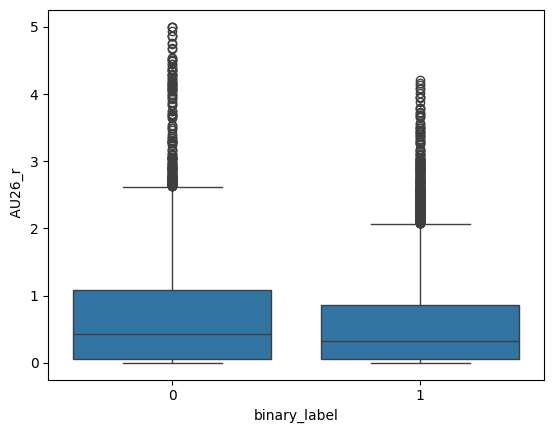

-----------------------------------
 AU02_c


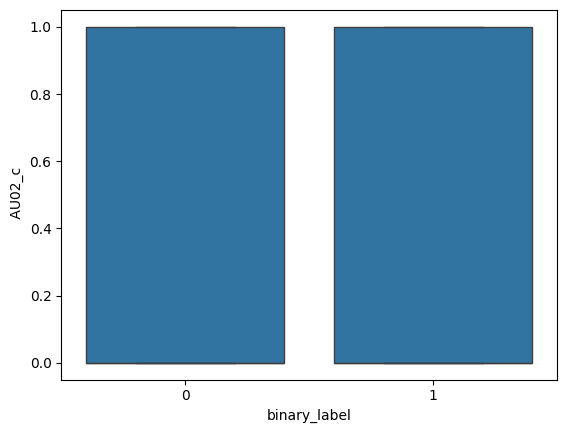

-----------------------------------
 AU04_c


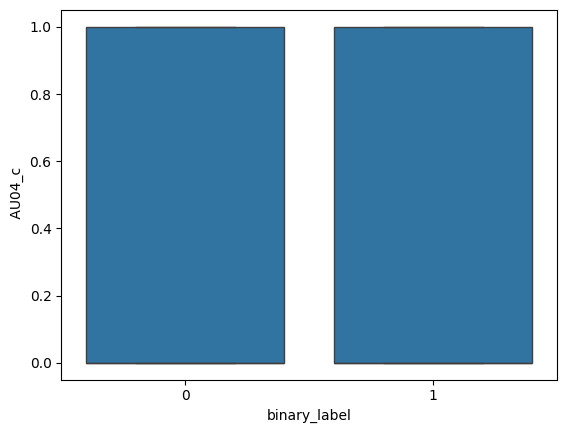

-----------------------------------
 AU05_c


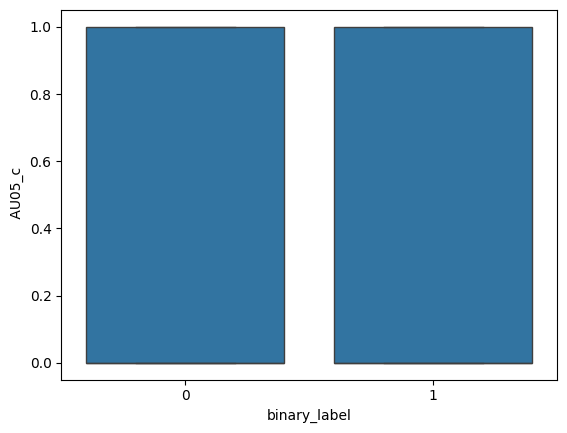

-----------------------------------
 AU06_c


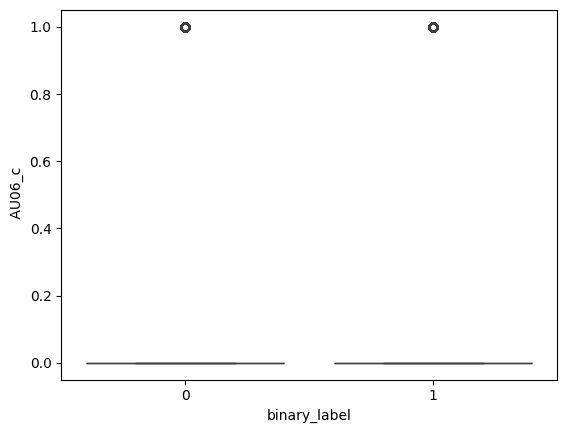

-----------------------------------
 AU09_c


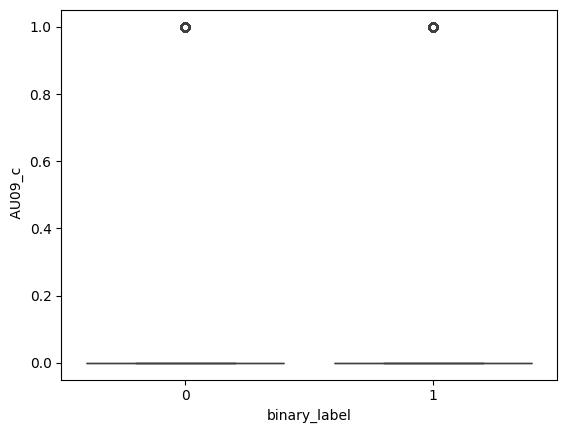

-----------------------------------
 AU10_c


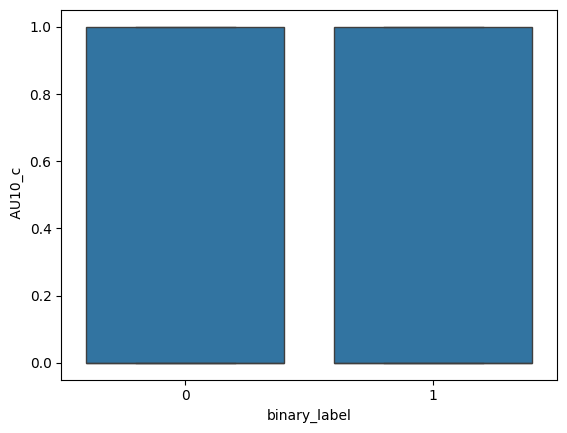

-----------------------------------
 AU14_c


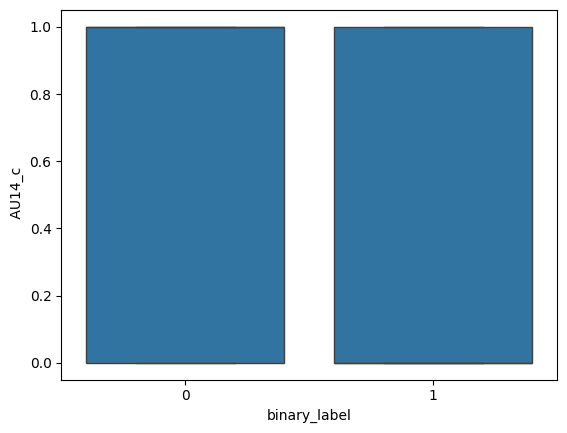

-----------------------------------
 AU15_c


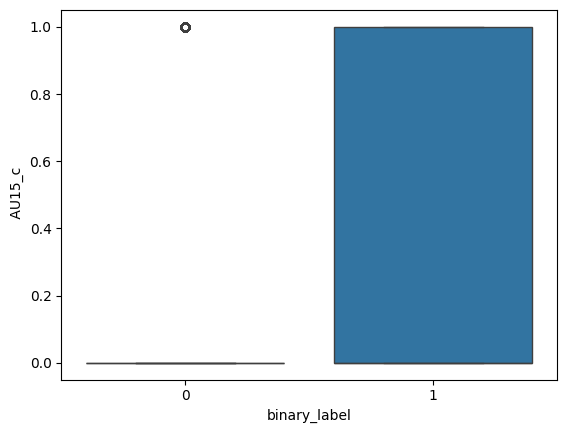

-----------------------------------
 AU20_c


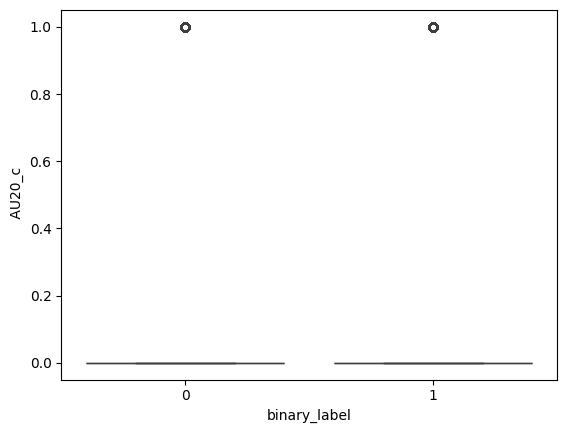

-----------------------------------
 AU23_c


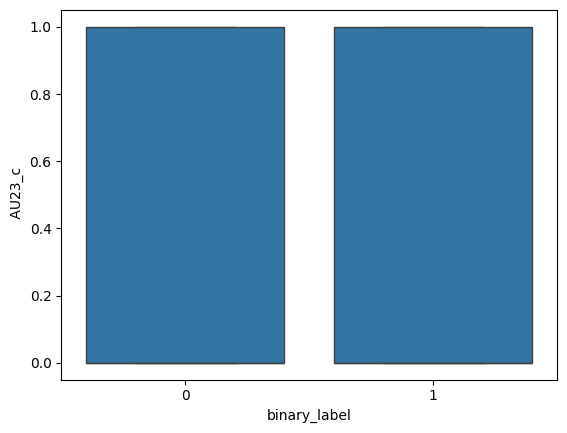

-----------------------------------
 AU25_c


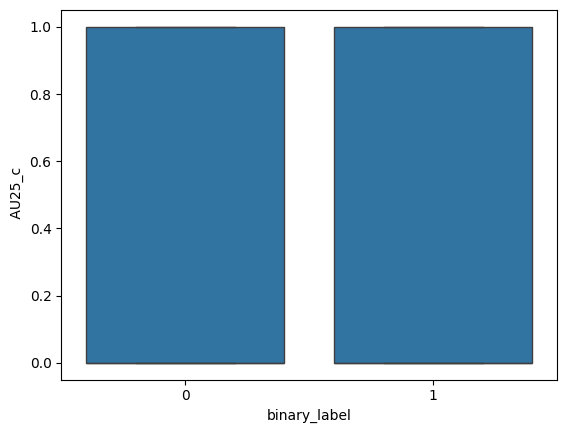

-----------------------------------
 AU26_c


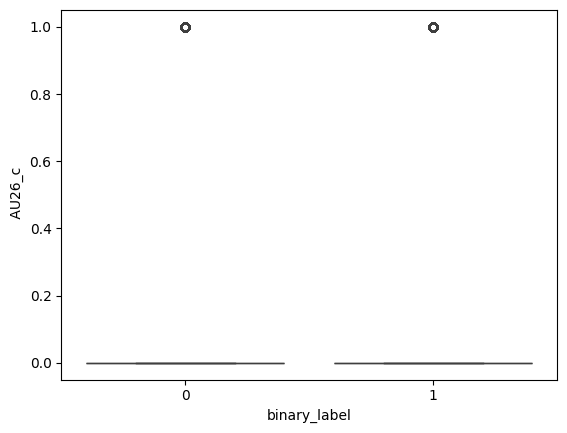

-----------------------------------
 AU28_c


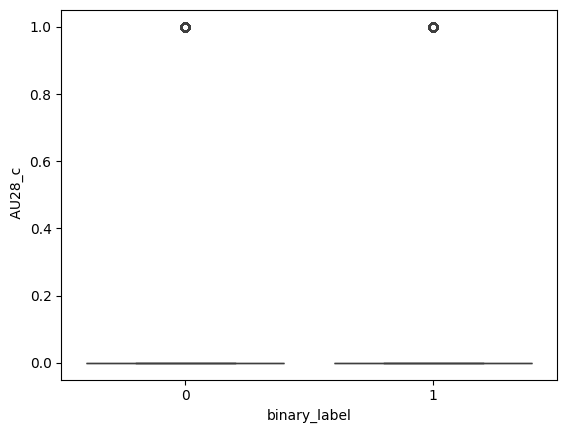

-----------------------------------
Loudness_sma3


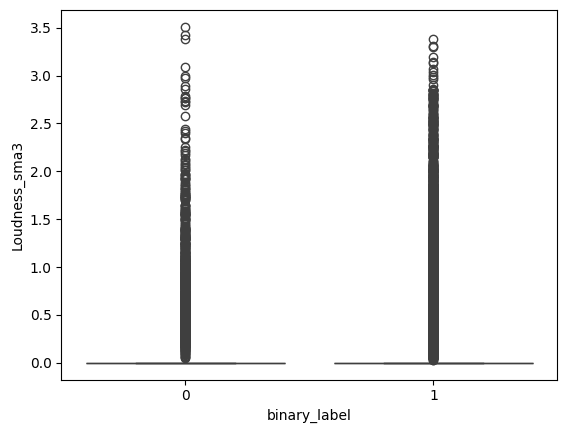

-----------------------------------
alphaRatio_sma3


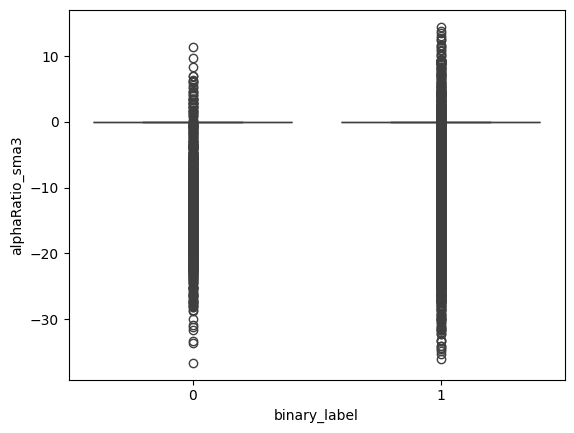

-----------------------------------
hammarbergIndex_sma3


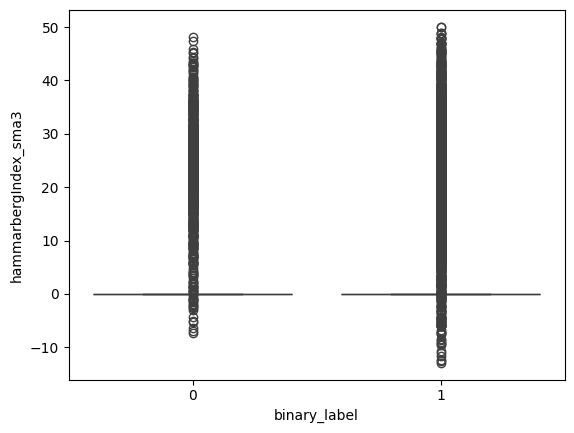

-----------------------------------
slope500-1500_sma3


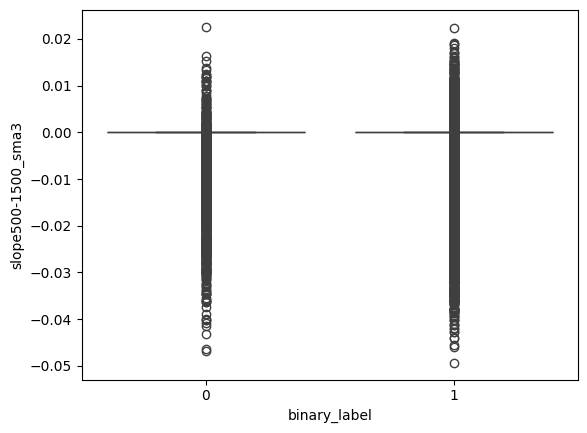

-----------------------------------
spectralFlux_sma3


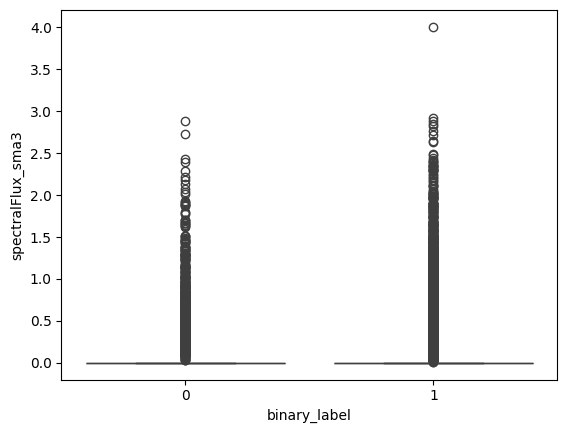

-----------------------------------
mfcc1_sma3


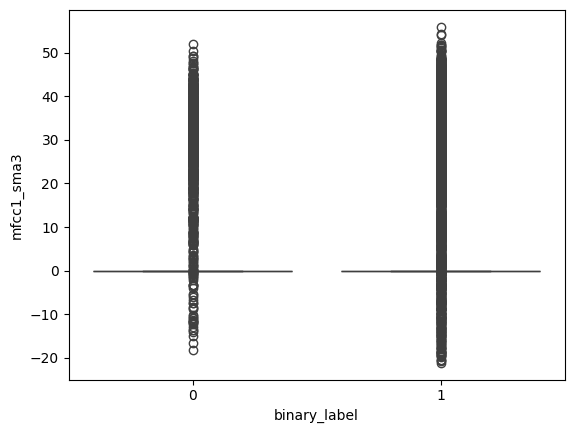

-----------------------------------
mfcc3_sma3


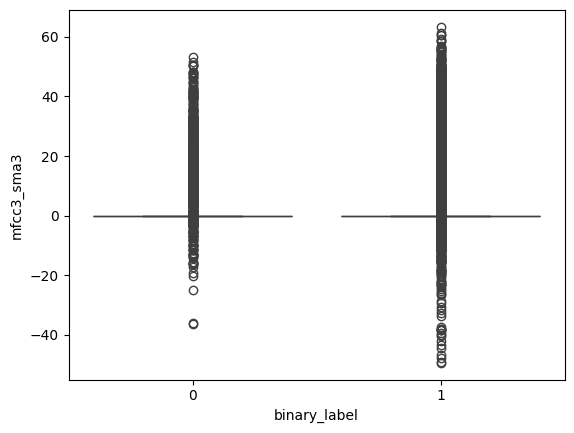

-----------------------------------
mfcc4_sma3


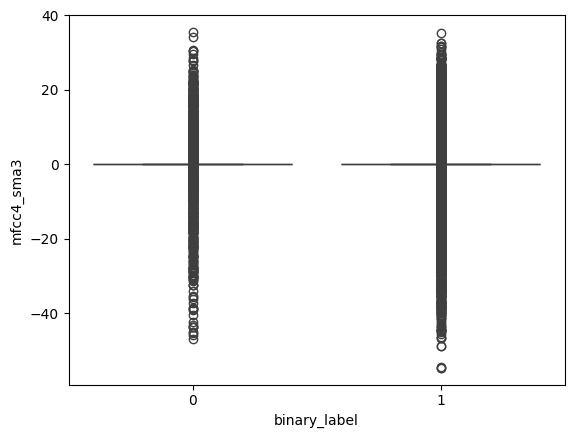

-----------------------------------
F0semitoneFrom27.5Hz_sma3nz


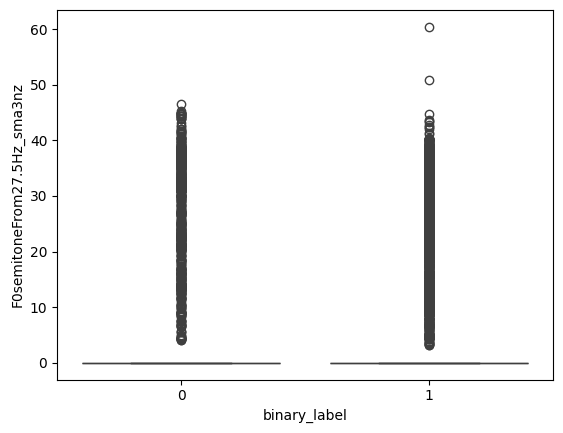

-----------------------------------
jitterLocal_sma3nz


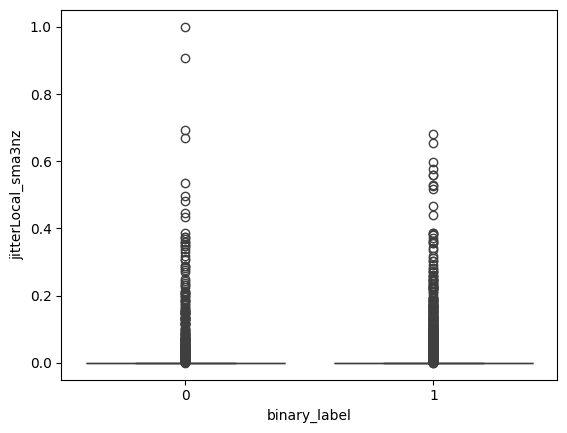

-----------------------------------
shimmerLocaldB_sma3nz


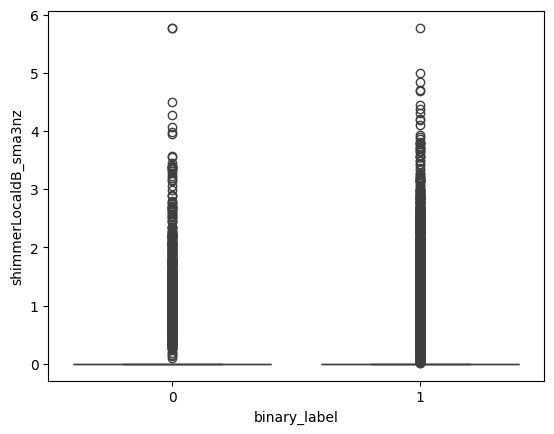

-----------------------------------
HNRdBACF_sma3nz


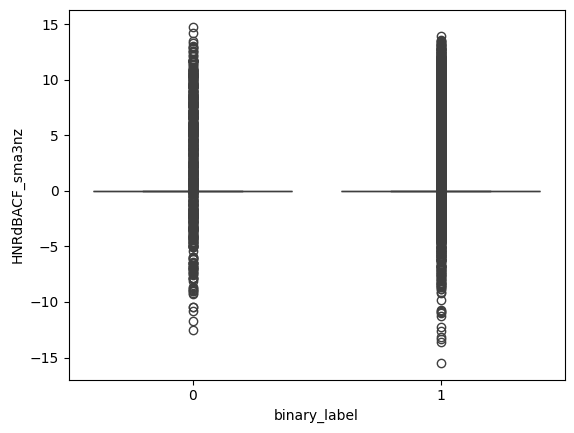

-----------------------------------
logRelF0-H1-H2_sma3nz


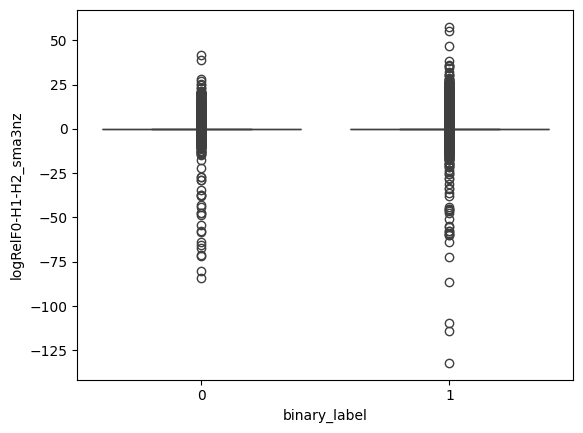

-----------------------------------
logRelF0-H1-A3_sma3nz


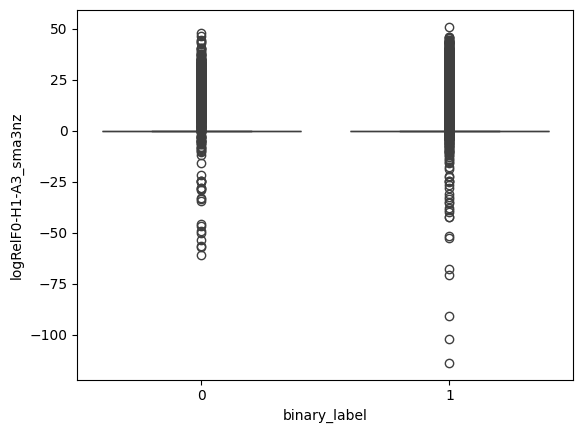

-----------------------------------
F1frequency_sma3nz


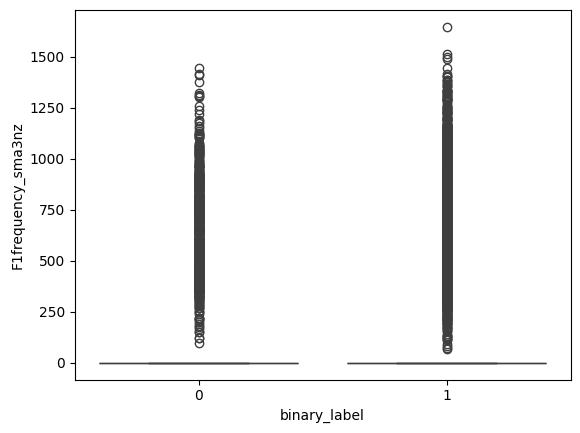

-----------------------------------
F1bandwidth_sma3nz


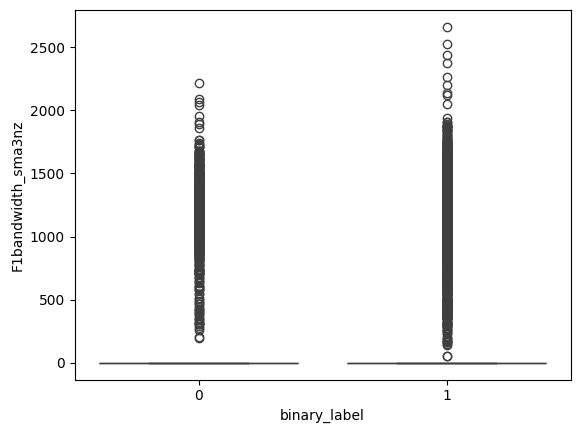

-----------------------------------
F1amplitudeLogRelF0_sma3nz


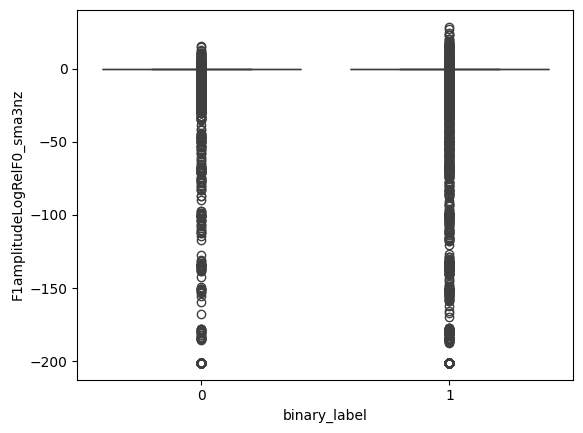

-----------------------------------
F2frequency_sma3nz


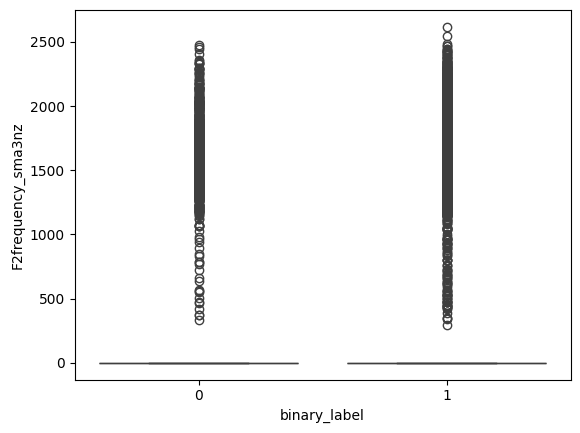

-----------------------------------
F2bandwidth_sma3nz


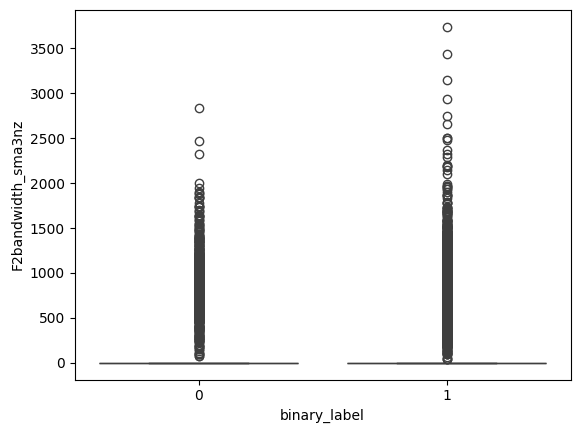

-----------------------------------
F2amplitudeLogRelF0_sma3nz


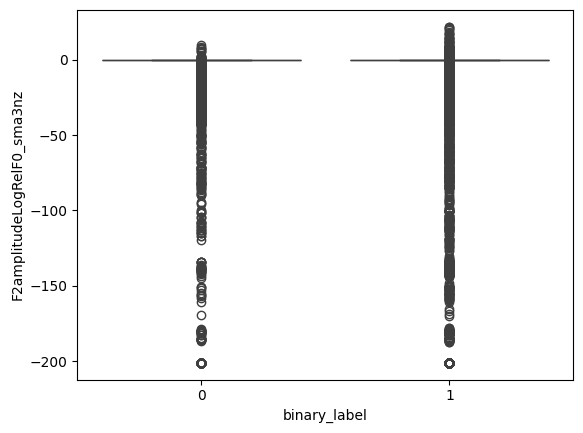

-----------------------------------
F3frequency_sma3nz


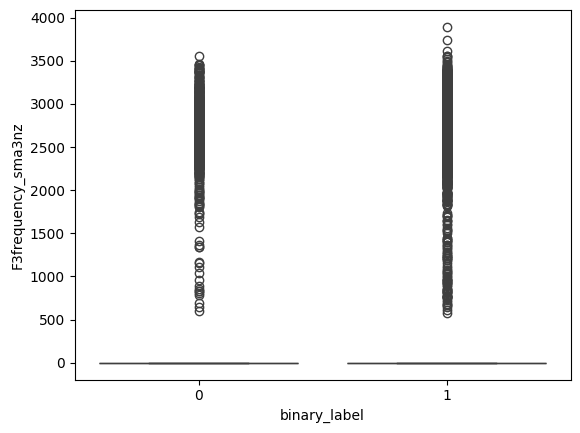

-----------------------------------
F3bandwidth_sma3nz


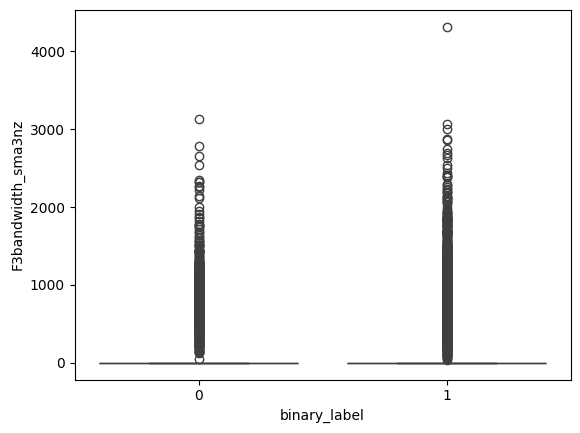

-----------------------------------
F3amplitudeLogRelF0_sma3nz


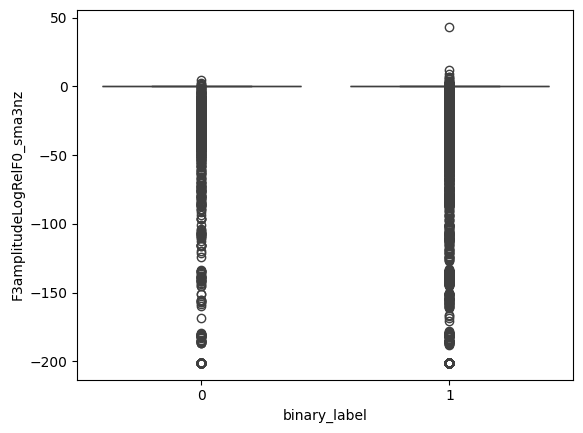

[' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r', ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r', ' AU15_r', ' AU17_r', ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r', ' AU45_r']
-----------------------------------
 AU01_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


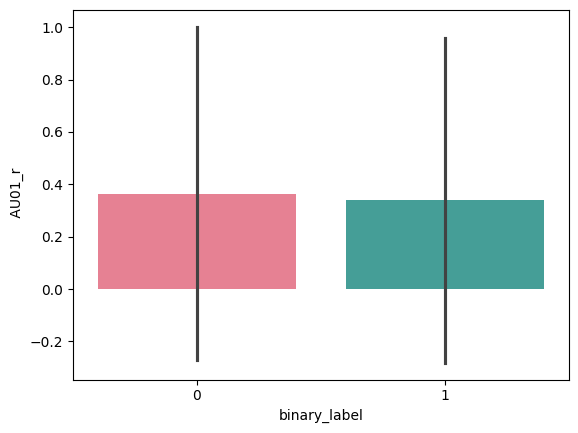

-----------------------------------
 AU02_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


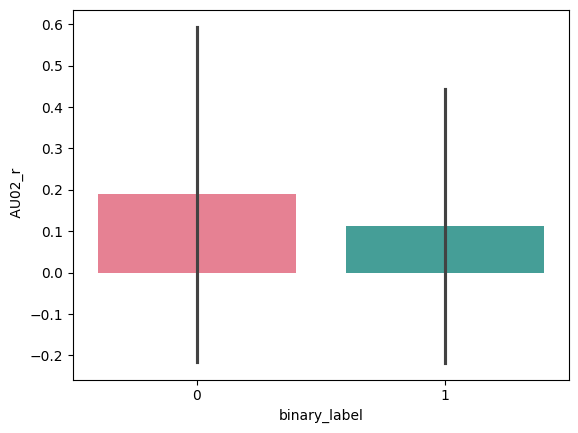

-----------------------------------
 AU04_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


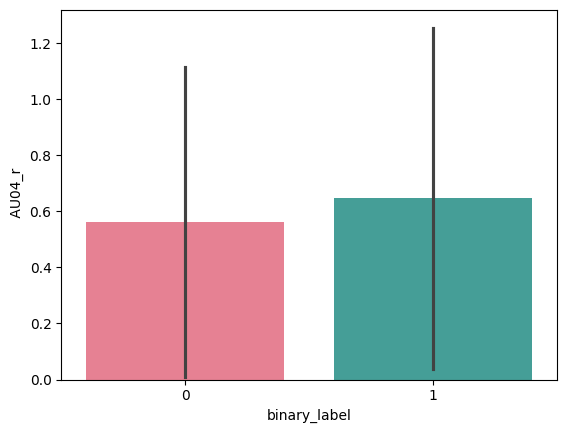

-----------------------------------
 AU05_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


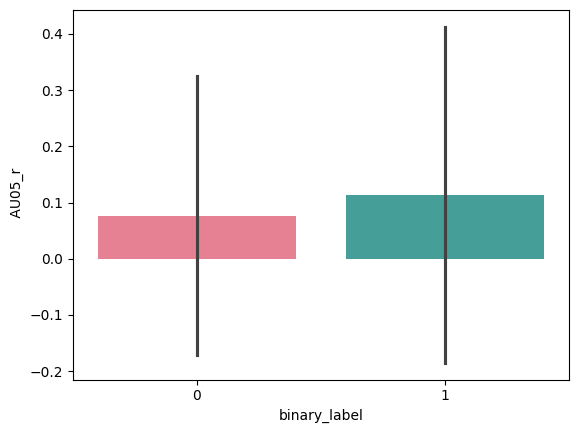

-----------------------------------
 AU06_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


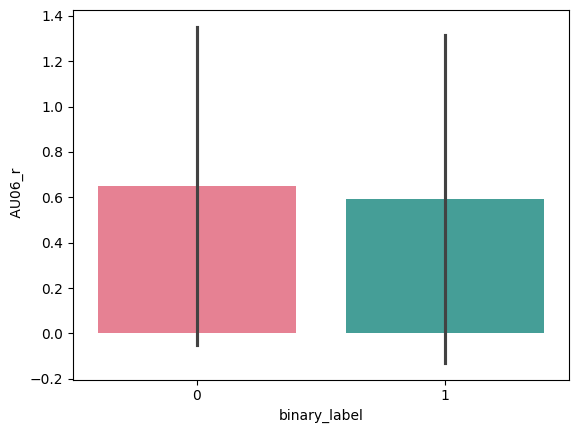

-----------------------------------
 AU07_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


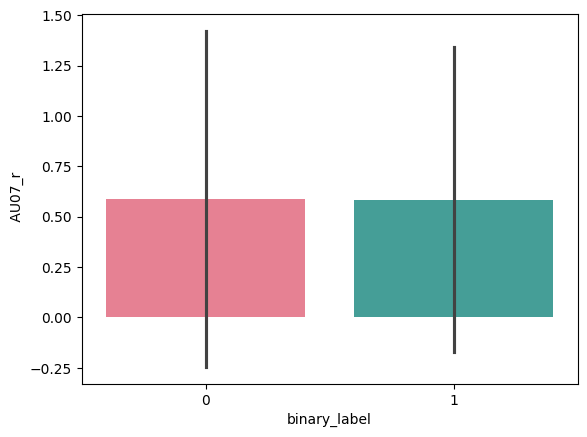

-----------------------------------
 AU09_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


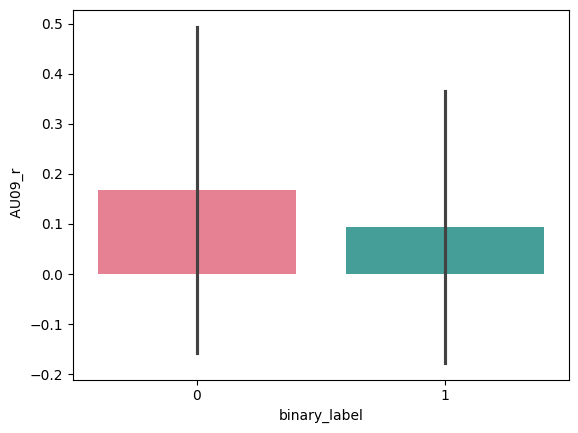

-----------------------------------
 AU10_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


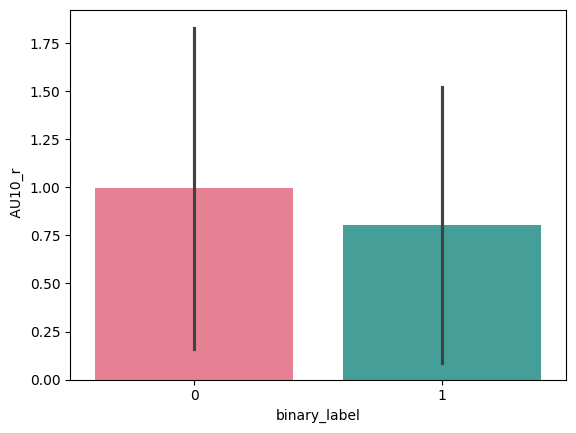

-----------------------------------
 AU12_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


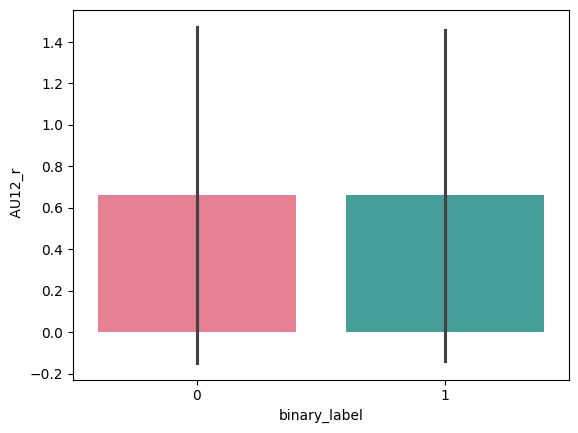

-----------------------------------
 AU14_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


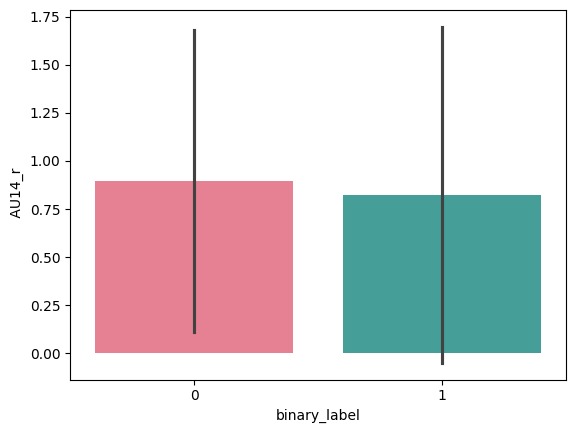

-----------------------------------
 AU15_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


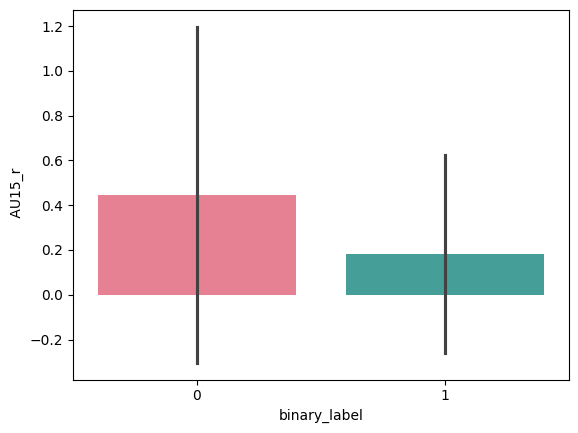

-----------------------------------
 AU17_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


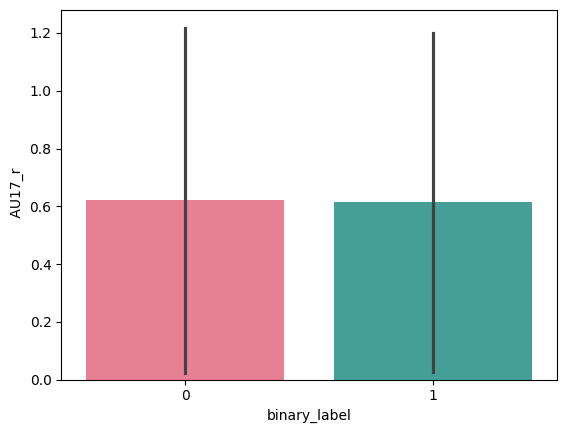

-----------------------------------
 AU20_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


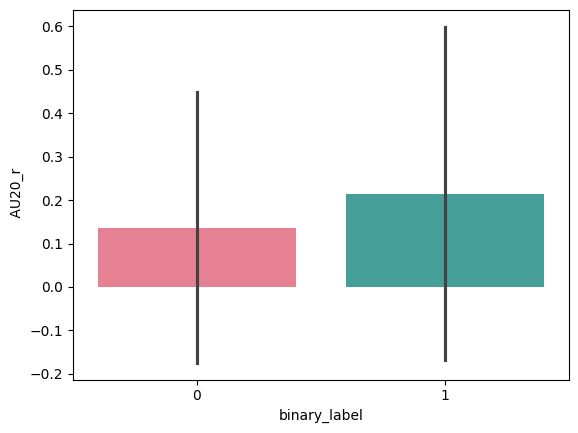

-----------------------------------
 AU23_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


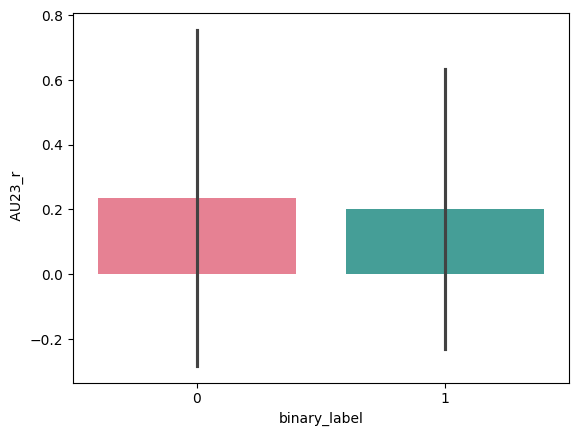

-----------------------------------
 AU25_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


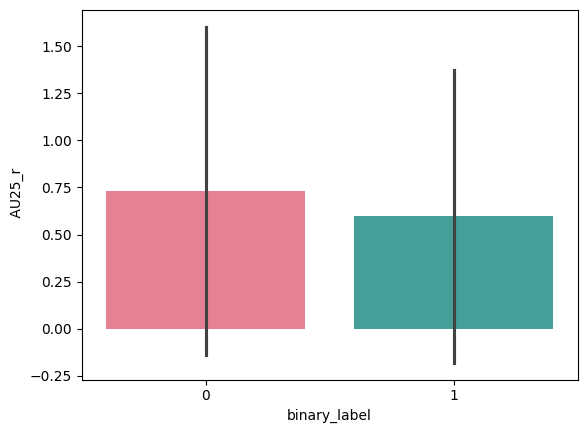

-----------------------------------
 AU26_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


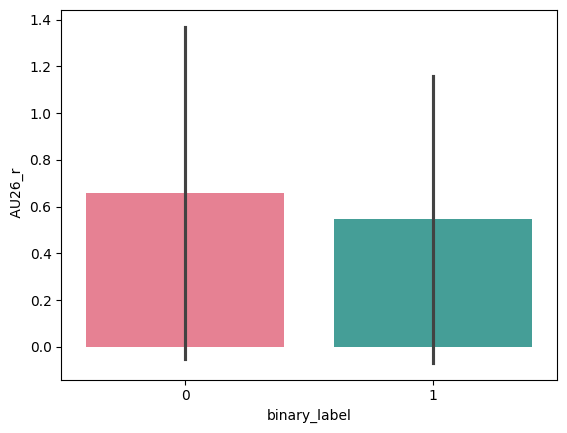

-----------------------------------
 AU45_r


/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
/tmp/ipykernel_100942/3440245152.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)


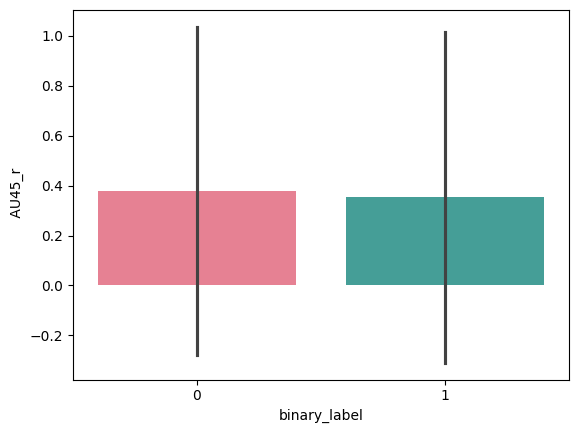

In [17]:
#for each significant feature, plot the data in a bar plot to see the difference

for feature in sign_features:
    print('-----------------------------------')
    print(feature)
    #get the data
    data = df[feature]
    #get the classes
    classes = df['binary_label']
    data_0 = data[classes==0]
    data_1 = data[classes==1]
    #plot the data
    sns.boxplot(x=classes, y=data)
    plt.show()


#select only features that have "_r", and plot them side by side with different colors for different classes, in bar plot. one color per class
features_r = [f for f in features if '_r' in f]
print(features_r)
#select colors
colors = sns.color_palette("husl", 2)

for feature in features_r:
    print('-----------------------------------')
    print(feature)
    #get the data
    data = df[feature]
    #get the classes
    classes = df['binary_label']
    data_0 = data[classes==0]
    data_1 = data[classes==1]
    #plot the data
    sns.barplot(x=classes, y=data, ci= 'sd', palette=colors)
    plt.show()
    


In [11]:
#make it into a df as save as csv
df_sign = pd.DataFrame()
df_sign['feature'] = sign_features
df_sign['p_value'] = p_vals
df_sign.to_csv('sign_features_ttest_full.csv', index=False)

# Multiclass test

In [2]:
#open data
df = pd.read_csv('../../data/all_participants_merged_correct.csv')
#df_norm = pd.read_csv('../../data/pair_features_overlap_high_discomfort_10hz_normalized.csv')
#get columns
cols = df.columns
#print(cols)
#get features, anything from column 4 to the end
features = cols[4:]
#features = [f for f in features if 'r' in f]~
#remove features that have x, y or z but don't have the word "delta"
print(features)
print(len(features))
classes = cols[3]
participant_col = cols[1]

print(df.shape)
#remove all rows where class is 0 (neutral)
df = df[df[classes] != 0]
#also 4
df = df[df[classes] != 4]
#also 5
df = df[df[classes] != 5]

#also, remove columns if "_c" in the name
features = [f for f in features if '_c' not in f]

print(df[classes].unique())
print(df.shape)
#reindex
df = df.reset_index(drop=True)

#count number of features with "_delta"
count_pose = 0
count_face = 0
count_audio = 0
count = 0
for feature in features:
    count += 1
    if 'delta' in feature:
        count_pose += 1
    elif '_r' in feature or '_c' in feature:
        count_face += 1
    else:
        count_audio += 1

print(count_pose)
print(count_face)
print(count_audio)
print(count)
#we can do all, or participant by participan

Index(['nose_x_delta', 'nose_y_delta', 'neck_x_delta', 'neck_y_delta',
       'rightshoulder_x_delta', 'rightshoulder_y_delta', 'rightelbow_x_delta',
       'rightelbow_y_delta', 'rightwrist_x_delta', 'rightwrist_y_delta',
       'leftshoulder_x_delta', 'leftshoulder_y_delta', 'leftelbow_x_delta',
       'leftelbow_y_delta', 'leftwrist_x_delta', 'leftwrist_y_delta',
       'righteye_x_delta', 'righteye_y_delta', 'lefteye_x_delta',
       'lefteye_y_delta', 'rightear_x_delta', 'rightear_y_delta',
       'leftear_x_delta', 'leftear_y_delta', ' AU01_r', ' AU02_r', ' AU04_r',
       ' AU05_r', ' AU06_r', ' AU07_r', ' AU09_r', ' AU10_r', ' AU12_r',
       ' AU14_r', ' AU15_r', ' AU17_r', ' AU20_r', ' AU23_r', ' AU25_r',
       ' AU26_r', ' AU45_r', ' AU01_c', ' AU02_c', ' AU04_c', ' AU05_c',
       ' AU06_c', ' AU07_c', ' AU09_c', ' AU10_c', ' AU12_c', ' AU14_c',
       ' AU15_c', ' AU17_c', ' AU20_c', ' AU23_c', ' AU25_c', ' AU26_c',
       ' AU28_c', ' AU45_c', 'Loudness_sma3', 'alphaRati

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming df is your DataFrame with features and multiclass_label
def run_multiclass_statistical_analysis(df, features):
    # Dictionary to store results
    results = {
        'anova_p_values': {},
        'significant_features': [],
        'post_hoc_results': {}
    }
    
    # Perform one-way ANOVA for each feature
    for feature in features:
        # Group the data by class
        groups = [group[feature].values for name, group in df.groupby('multiclass_label')]
        
        # Perform one-way ANOVA
        f_statistic, p_value = stats.f_oneway(*groups)
        
        # Store ANOVA p-value
        results['anova_p_values'][feature] = p_value
        
        # Check significance after Bonferroni correction
        corrected_p_value = p_value * len(features)
        
        if corrected_p_value < 0.05:
            results['significant_features'].append(feature)
            
            # Perform Tukey's HSD post-hoc test for significant features
            tukey_results = pairwise_tukeyhsd(
                df[feature], 
                df['multiclass_label']
            )
            results['post_hoc_results'][feature] = tukey_results
    
    return results

# Usage
# Assuming you have already prepared your DataFrame
results = run_multiclass_statistical_analysis(df, features)

# Print results
print("ANOVA p-values:")
for feature, p_value in results['anova_p_values'].items():
    print(f"{feature}: {p_value}")

print("\nSignificant Features:")
print(results['significant_features'])
print(len(results['significant_features']))

print("\nPost-hoc Test Results for Significant Features:")
for feature, tukey_result in results['post_hoc_results'].items():
    print(f"\n{feature} Tukey HSD Test:")
    print(tukey_result)

ANOVA p-values:
nose_x_delta: 0.9998474664559698
nose_y_delta: 0.024077831046937816
neck_x_delta: 0.9969589679251847
neck_y_delta: 0.9991483448823358
rightshoulder_x_delta: 0.8908200121093824
rightshoulder_y_delta: 0.9183382680017365
rightelbow_x_delta: 0.9851105413643627
rightelbow_y_delta: 0.98822056272111
rightwrist_x_delta: 0.9737066107712951
rightwrist_y_delta: 0.9888408273589102
leftshoulder_x_delta: 0.6748954181634346
leftshoulder_y_delta: 0.8794292531717554
leftelbow_x_delta: 0.9948813789572456
leftelbow_y_delta: 0.9914923185977743
leftwrist_x_delta: 0.9215778120922802
leftwrist_y_delta: 0.9562186680792094
righteye_x_delta: 0.9995336867254229
righteye_y_delta: 0.8300921348037107
lefteye_x_delta: 0.9998288132156014
lefteye_y_delta: 0.04274426619469469
rightear_x_delta: 0.9875309741252437
rightear_y_delta: 0.9875780160893509
leftear_x_delta: 0.9997747931136439
leftear_y_delta: 0.9965485617665002
 AU01_r: 1.0192513104820813e-06
 AU02_r: 2.1109052023638545e-09
 AU04_r: 1.6667735405

-----------------------------------
 AU01_r


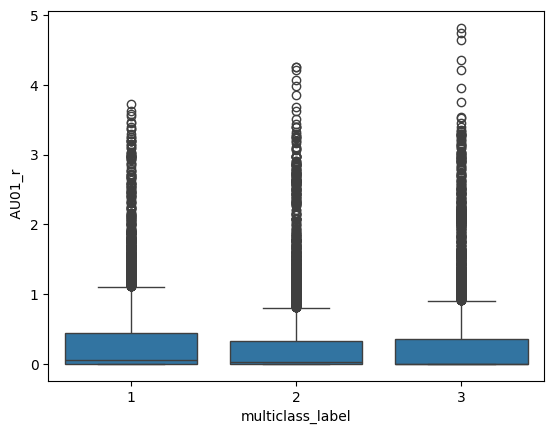

-----------------------------------
 AU02_r


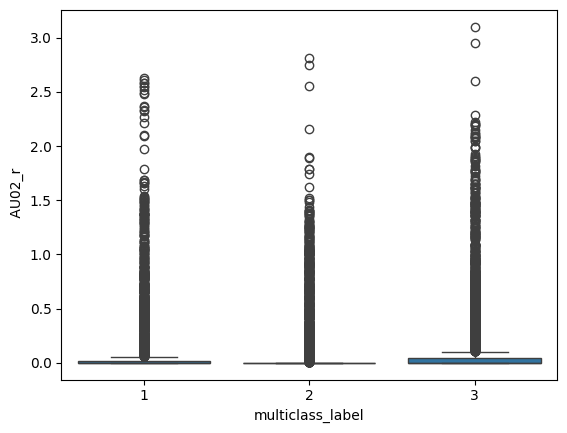

-----------------------------------
 AU04_r


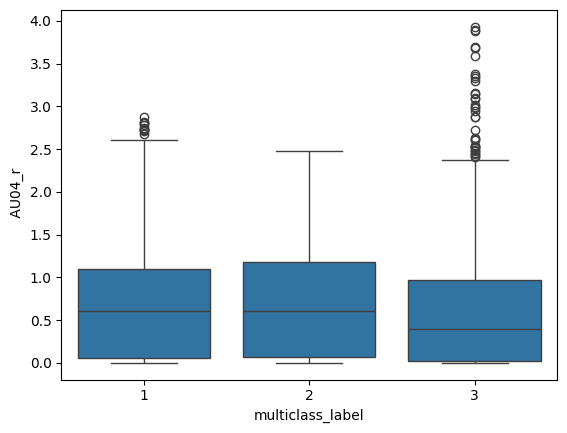

-----------------------------------
 AU05_r


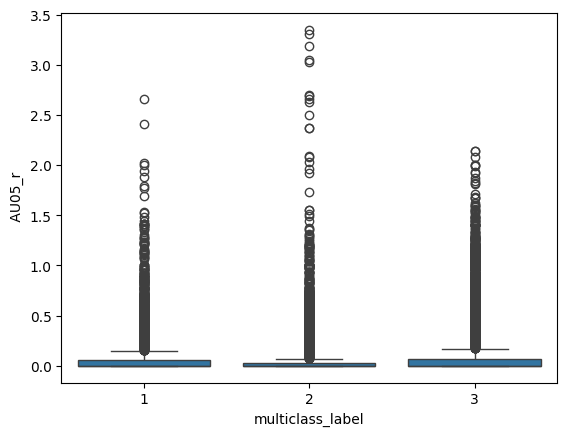

-----------------------------------
 AU06_r


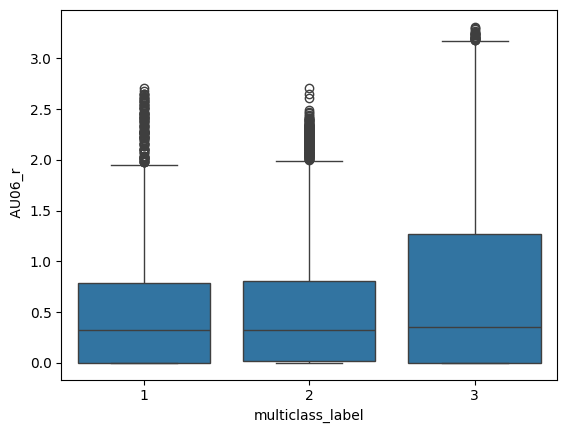

-----------------------------------
 AU07_r


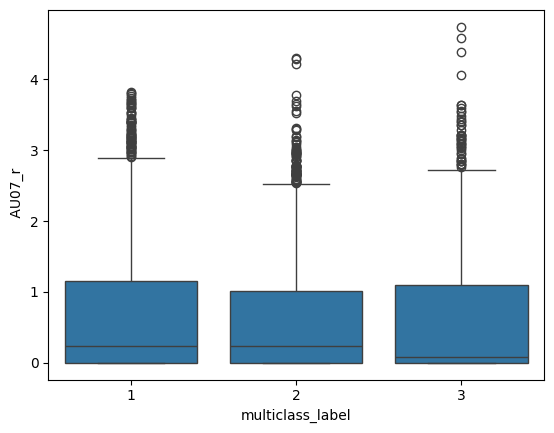

-----------------------------------
 AU09_r


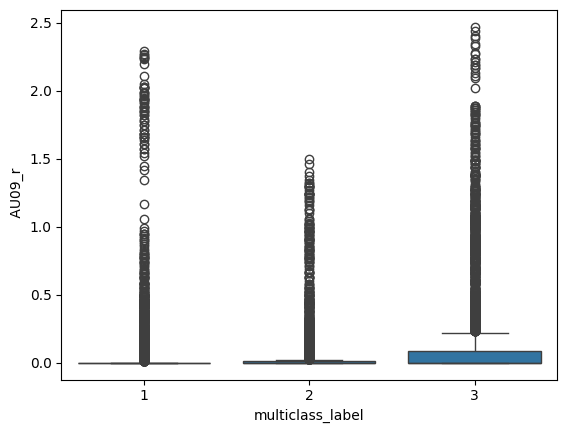

-----------------------------------
 AU10_r


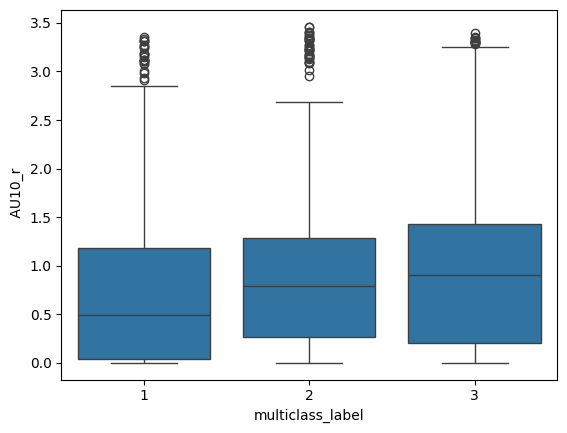

-----------------------------------
 AU12_r


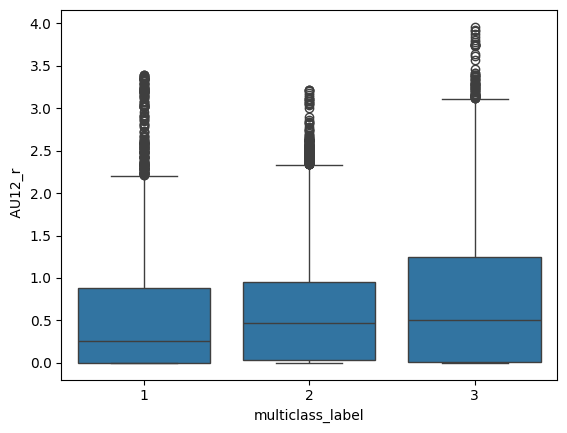

-----------------------------------
 AU14_r


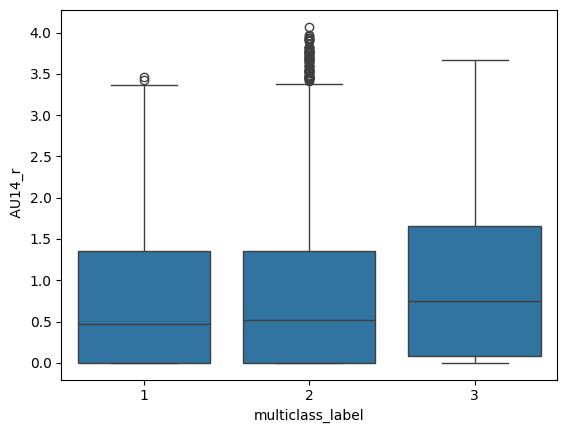

-----------------------------------
 AU15_r


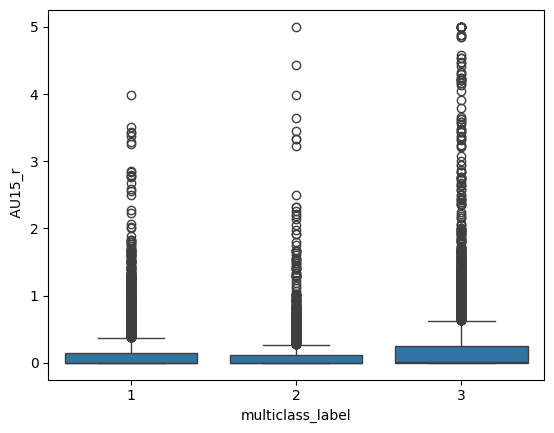

-----------------------------------
 AU17_r


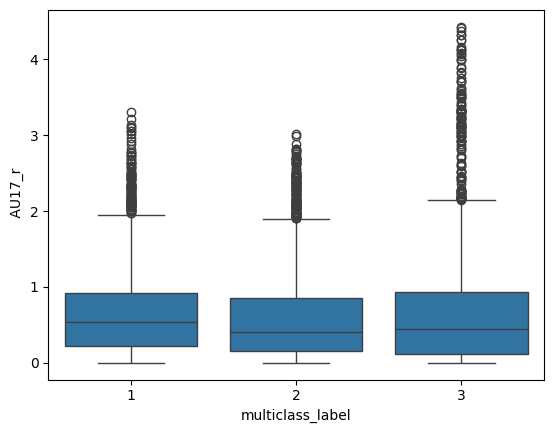

-----------------------------------
 AU20_r


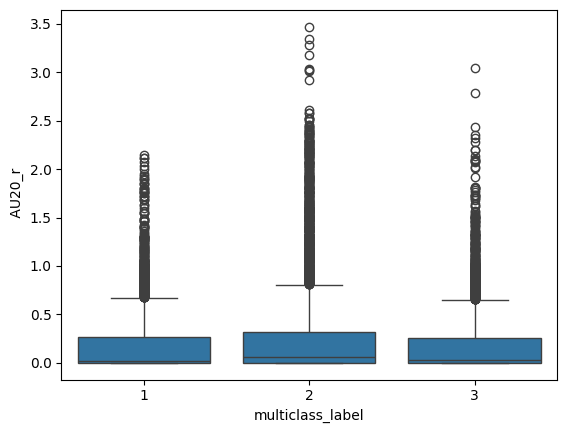

-----------------------------------
 AU23_r


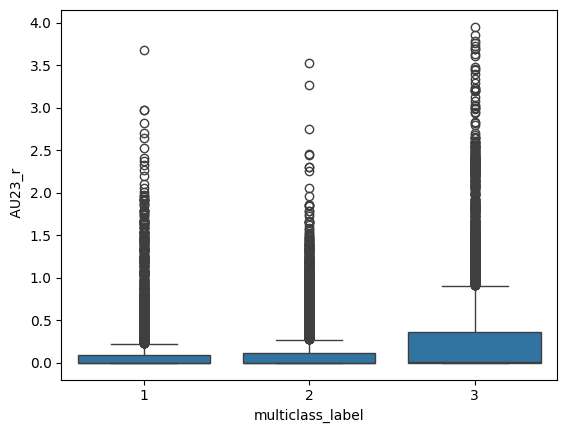

-----------------------------------
 AU25_r


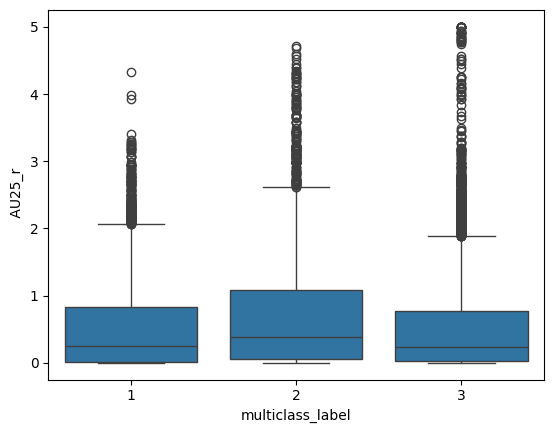

-----------------------------------
 AU26_r


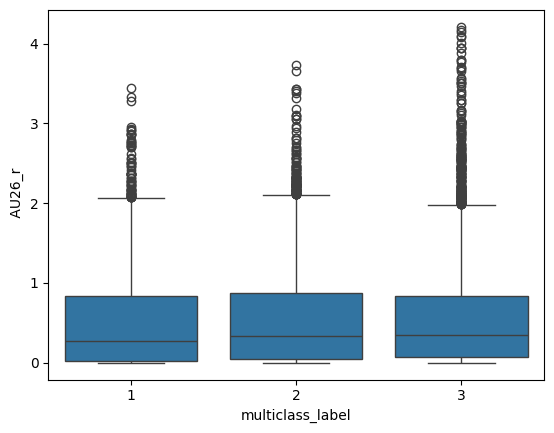

-----------------------------------
 AU45_r


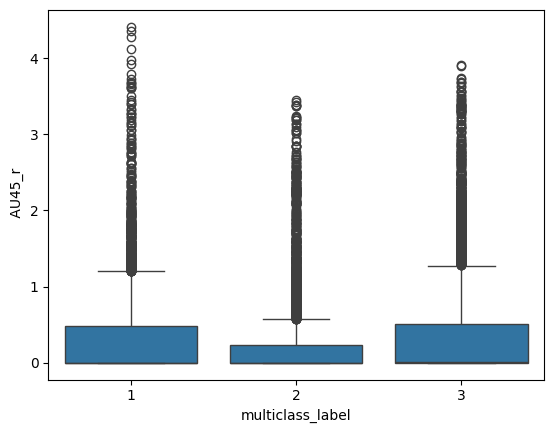

-----------------------------------
Loudness_sma3


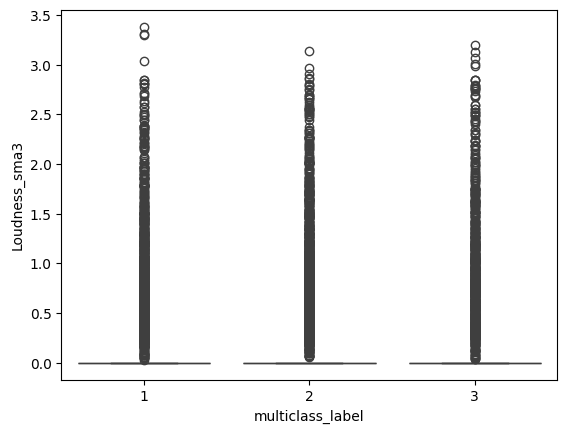

-----------------------------------
alphaRatio_sma3


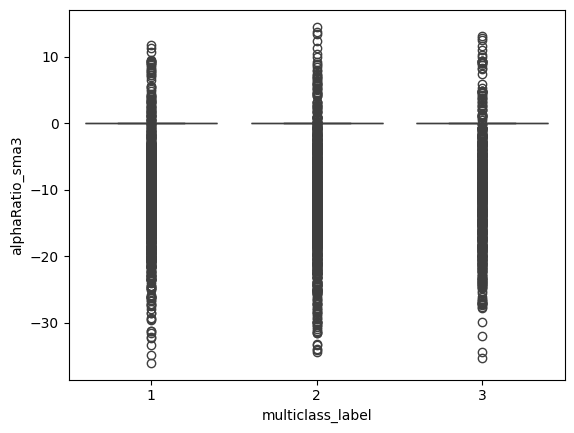

-----------------------------------
hammarbergIndex_sma3


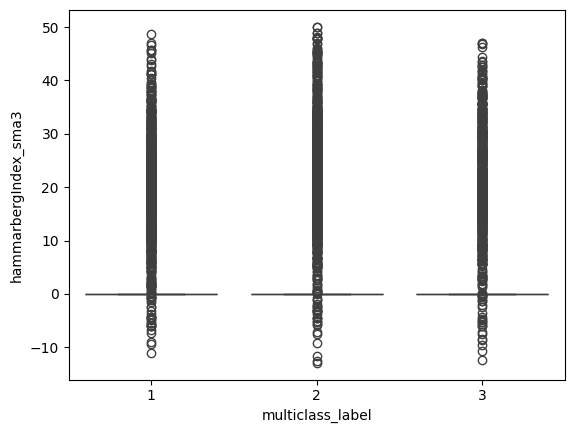

-----------------------------------
slope500-1500_sma3


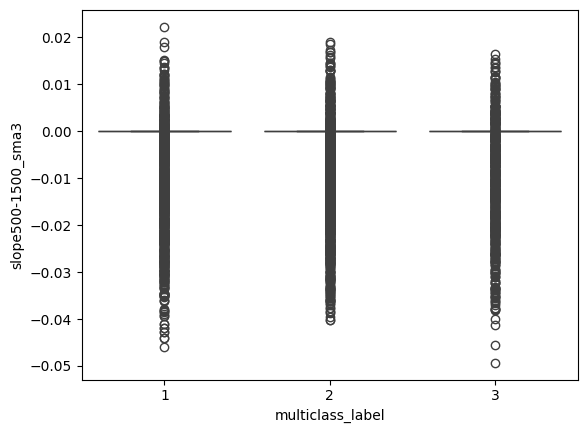

-----------------------------------
spectralFlux_sma3


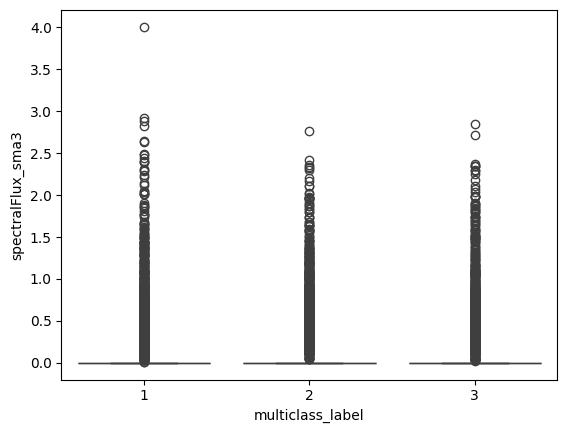

-----------------------------------
mfcc1_sma3


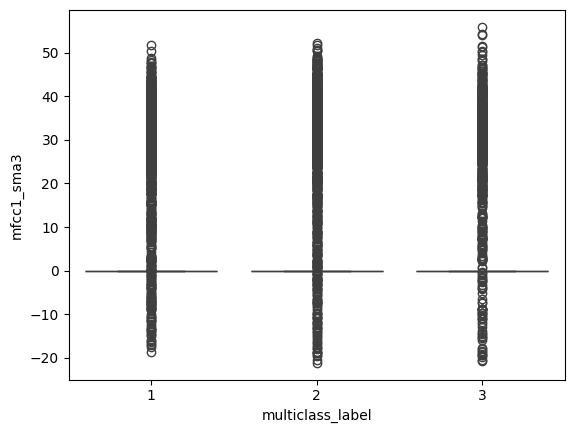

-----------------------------------
mfcc2_sma3


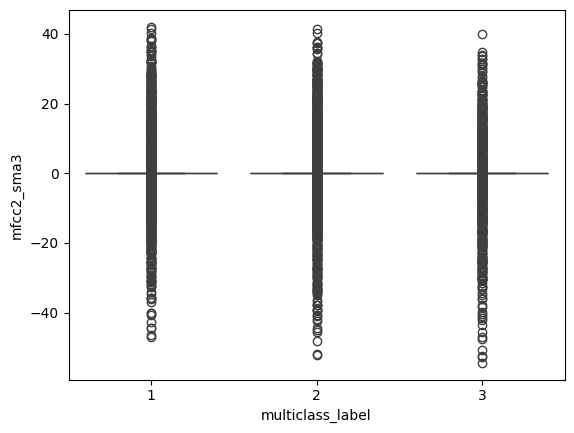

-----------------------------------
mfcc3_sma3


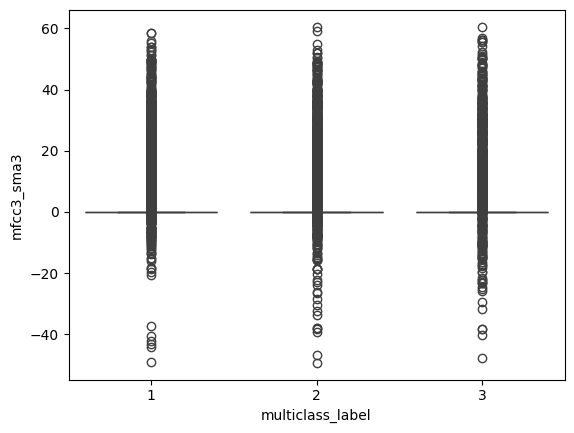

-----------------------------------
F0semitoneFrom27.5Hz_sma3nz


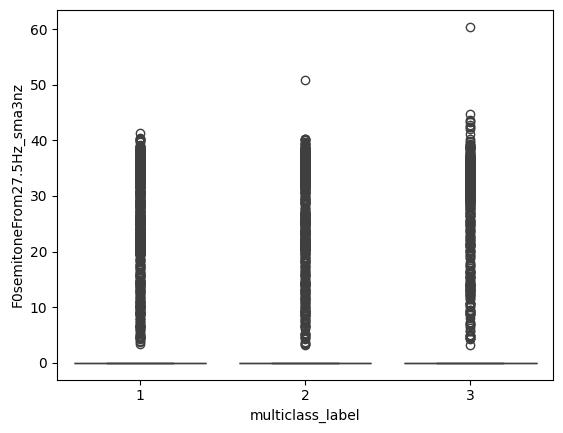

-----------------------------------
jitterLocal_sma3nz


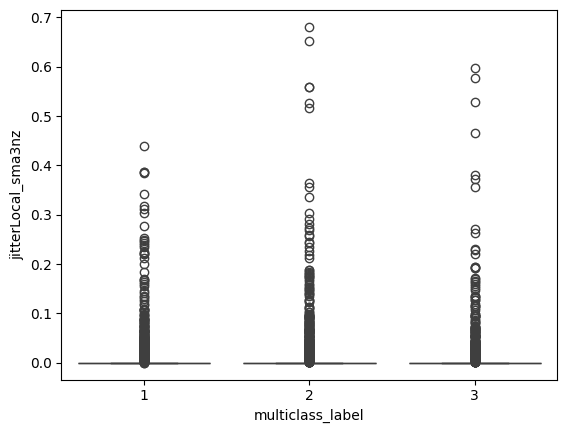

-----------------------------------
shimmerLocaldB_sma3nz


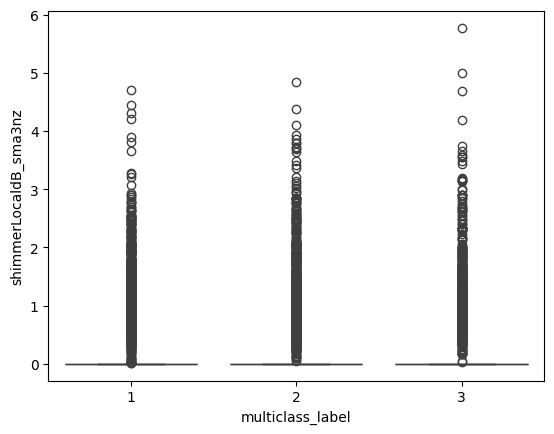

-----------------------------------
HNRdBACF_sma3nz


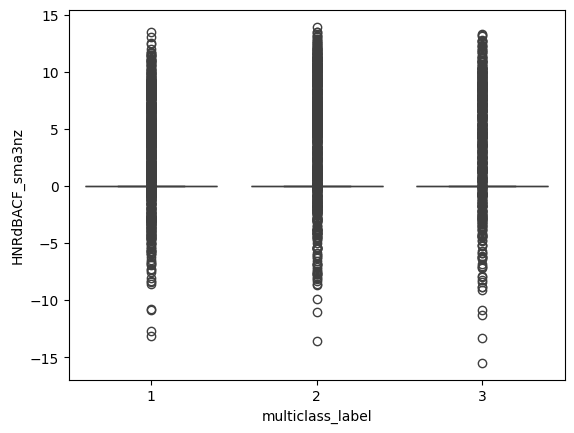

-----------------------------------
logRelF0-H1-A3_sma3nz


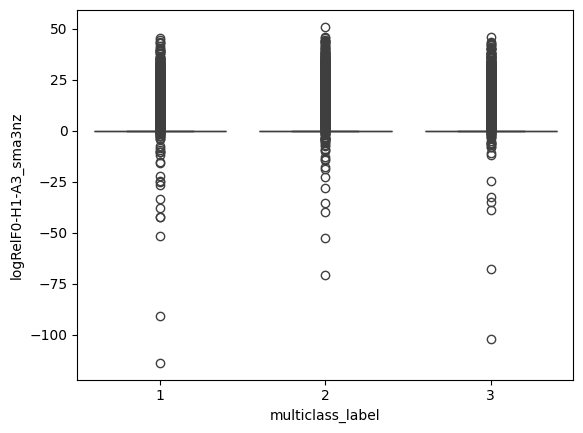

-----------------------------------
F1frequency_sma3nz


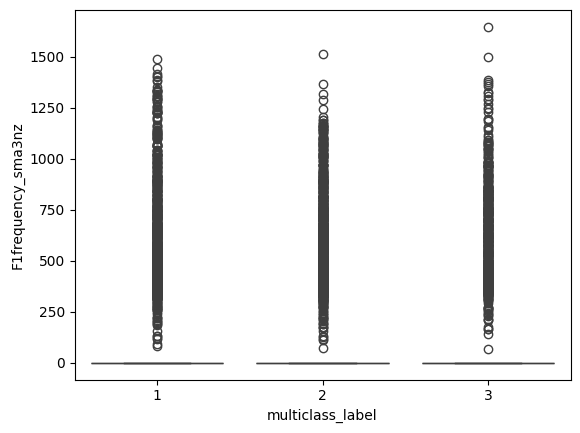

-----------------------------------
F1bandwidth_sma3nz


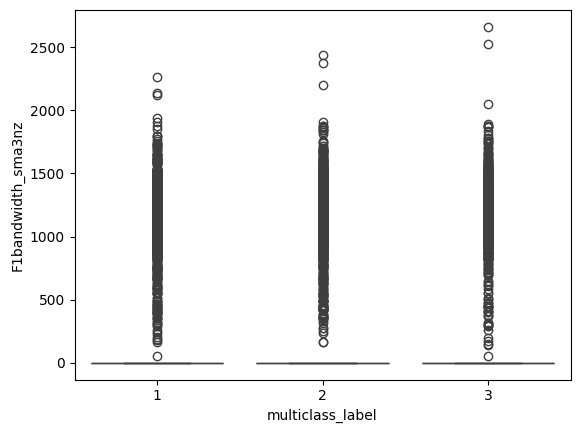

-----------------------------------
F1amplitudeLogRelF0_sma3nz


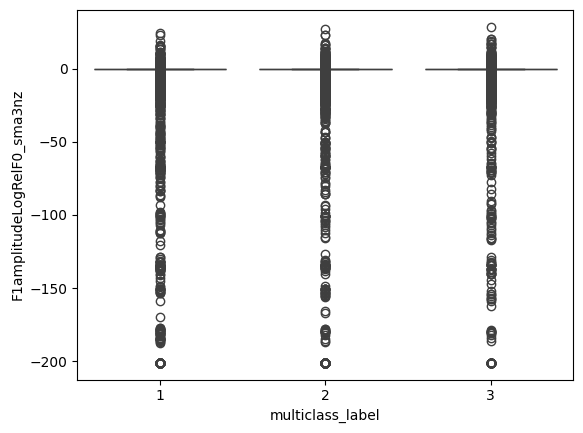

-----------------------------------
F2frequency_sma3nz


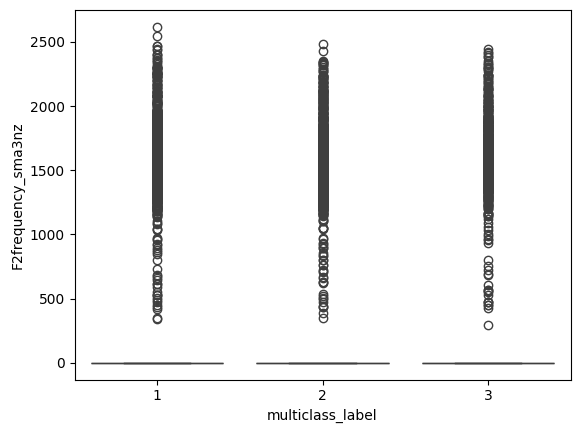

-----------------------------------
F2bandwidth_sma3nz


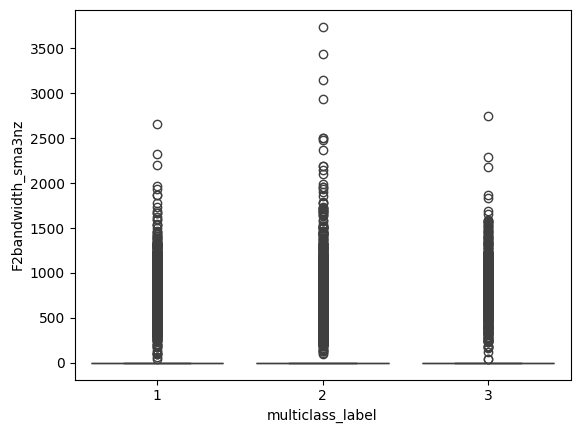

-----------------------------------
F2amplitudeLogRelF0_sma3nz


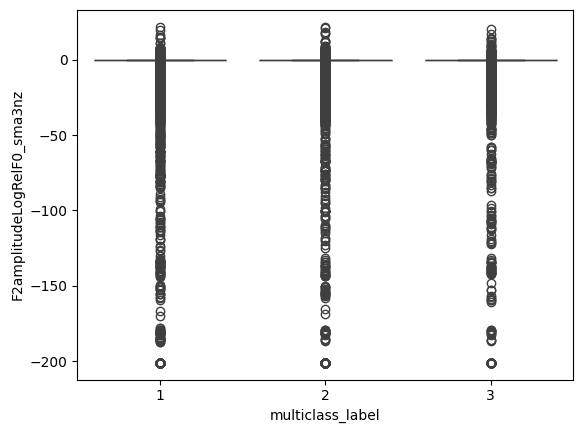

-----------------------------------
F3frequency_sma3nz


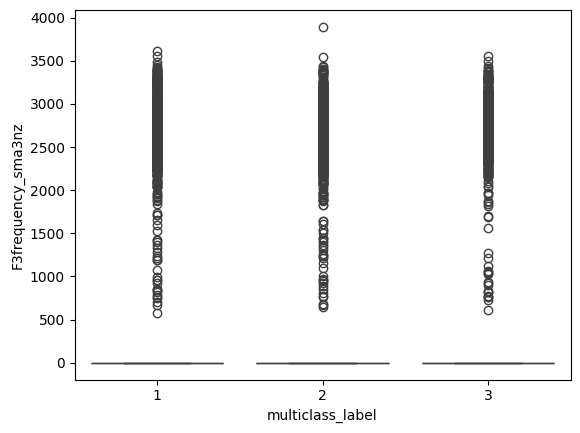

-----------------------------------
F3bandwidth_sma3nz


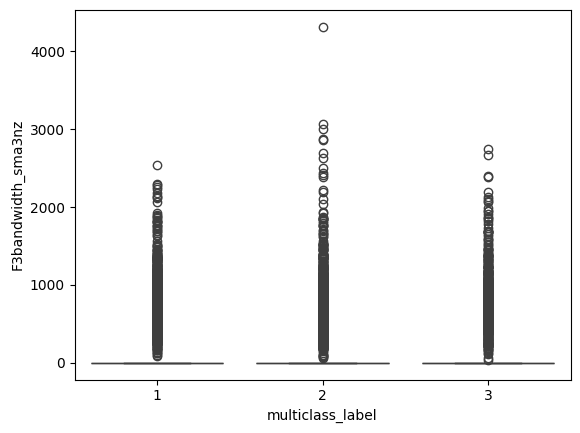

-----------------------------------
F3amplitudeLogRelF0_sma3nz


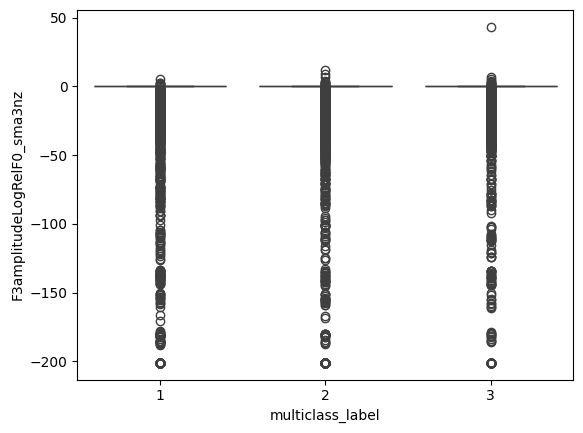

In [4]:
#for each significant feature, plot the data in a box plot to see the difference

for feature in results['significant_features']:
    print('-----------------------------------')
    print(feature)
    #get the data
    data = df[feature]
    #get the classes
    classes = df['multiclass_label']
    data_0 = data[classes==0]
    data_1 = data[classes==1]
    data_2 = data[classes==2]
    data_3 = data[classes==3]

    #plot the data
    sns.boxplot(x=classes, y=data)
    plt.show()


In [5]:
import scipy.stats as stats
import numpy as np

def check_normality(df, feature, group_column):
    normality_results = {}
    
    for group in df[group_column].unique():
        group_data = df[df[group_column] == group][feature]
        
        # Shapiro-Wilk test
        _, p_shapiro = stats.shapiro(group_data)
        
        # Skewness and Kurtosis
        skewness = stats.skew(group_data)
        kurtosis = stats.kurtosis(group_data)
        
        normality_results[group] = {
            'shapiro_p_value': p_shapiro,
            'skewness': skewness,
            'kurtosis': kurtosis,
            'sample_size': len(group_data)
        }
    
    return normality_results

# Usage
for feature in features:
    normality_check = check_normality(df, feature, 'multiclass_label')
    for group, stats_dict in normality_check.items():
        print(f"Group {group}:")
        print(f"  Sample Size: {stats_dict['sample_size']}")
        print(f"  Shapiro p-value: {stats_dict['shapiro_p_value']}")
        print(f"  Skewness: {stats_dict['skewness']}")
        print(f"  Kurtosis: {stats_dict['kurtosis']}")

Group 1:
  Sample Size: 3841
  Shapiro p-value: 2.7503540745654825e-88
  Skewness: -0.06380663194366809
  Kurtosis: 951.8118866911007
Group 2:
  Sample Size: 4859
  Shapiro p-value: 6.725238004481187e-94
  Skewness: -0.0065196710024158794
  Kurtosis: 239.72552731495614
Group 3:
  Sample Size: 5448
  Shapiro p-value: 4.877547852875665e-97
  Skewness: 0.05614682090595856
  Kurtosis: 269.10768666056555
Group 1:
  Sample Size: 3841
  Shapiro p-value: 4.2777098056817343e-67
  Skewness: -0.43024869675446775
  Kurtosis: 20.31495218571882
Group 2:
  Sample Size: 4859
  Shapiro p-value: 4.32474525326927e-78
  Skewness: 0.023299918938037394
  Kurtosis: 46.67652295034825
Group 3:
  Sample Size: 5448
  Shapiro p-value: 8.323017714882517e-77
  Skewness: 0.6858767454310057
  Kurtosis: 29.524318212396864
Group 1:
  Sample Size: 3841
  Shapiro p-value: 9.468103914042957e-59
  Skewness: -0.21267775507618236
  Kurtosis: 6.6682988874598905
Group 2:
  Sample Size: 4859
  Shapiro p-value: 7.961687765596451

/tmp/ipykernel_165882/204613394.py:11: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5448.
  _, p_shapiro = stats.shapiro(group_data)


Group 1:
  Sample Size: 3841
  Shapiro p-value: 6.327190054073268e-84
  Skewness: -0.07633184099390049
  Kurtosis: 38.092473962776126
Group 2:
  Sample Size: 4859
  Shapiro p-value: 3.5442573042349964e-90
  Skewness: -0.12899765015887793
  Kurtosis: 43.56128752810312
Group 3:
  Sample Size: 5448
  Shapiro p-value: 1.5289051613989275e-93
  Skewness: -0.04669056015554544
  Kurtosis: 42.940797239409804
Group 1:
  Sample Size: 3841
  Shapiro p-value: 2.8109622608951405e-57
  Skewness: 0.07587350014738425
  Kurtosis: 2.2641210328171217
Group 2:
  Sample Size: 4859
  Shapiro p-value: 2.4413814330509244e-64
  Skewness: -0.008197661000407792
  Kurtosis: 1.7649614220181453
Group 3:
  Sample Size: 5448
  Shapiro p-value: 8.180646872427113e-69
  Skewness: 0.30653518943935937
  Kurtosis: 15.981937413026749
Group 1:
  Sample Size: 3841
  Shapiro p-value: 2.1358662680963617e-56
  Skewness: 0.17272262110580536
  Kurtosis: 2.8330762702427688
Group 2:
  Sample Size: 4859
  Shapiro p-value: 2.1162839369

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn


def run_multiclass_nonparametric_analysis(df, features):
    # Dictionary to store results
    results = {
        'kruskal_p_values': {},
        'significant_features': [],
        'sign_feature_p_values': [],
        'post_hoc_results': {}
    }
    
    # Perform Kruskal-Wallis H-test for each feature
    for feature in features:
        # Group the data by class
        groups = [group[feature].values for name, group in df.groupby('multiclass_label')]
        
        # Perform Kruskal-Wallis H-test
        h_statistic, p_value = stats.kruskal(*groups)
        
        # Store Kruskal-Wallis p-value
        results['kruskal_p_values'][feature] = p_value
        
        # Check significance after Bonferroni correction
        corrected_p_value = p_value * len(features)
        
        if corrected_p_value < 0.05:
            results['significant_features'].append(feature)
            results['sign_feature_p_values'].append(corrected_p_value)
            
            # Perform Dunn's test for post-hoc pairwise comparisons
            dunn_results = posthoc_dunn(
                df, 
                val_col=feature, 
                group_col='multiclass_label', 
                p_adjust='bonferroni'
            )
            results['post_hoc_results'][feature] = dunn_results
    
    return results

# Usage
# Assuming you have already prepared your DataFrame
results = run_multiclass_nonparametric_analysis(df, features)

# Print results
print("Kruskal-Wallis p-values:")
for feature, p_value in results['kruskal_p_values'].items():
    print(f"{feature}: {p_value}")

print("\nSignificant Features:")
print(results['significant_features'])
print(len(results['significant_features']))

#create table with sign features and p values
df_sign = pd.DataFrame()
df_sign['feature'] = results['significant_features']
#Now p values but rounded to 3 decimals
results['sign_feature_p_values'] = [round(p, 3) for p in results['sign_feature_p_values']]

df_sign['p_value'] = results['sign_feature_p_values']
#df_sign.to_csv('sign_features_kruskal_full.csv', index=False)


print("\nPost-hoc Test Results for Significant Features:")
for feature, dunn_result in results['post_hoc_results'].items():
    print(f"\n{feature} Dunn's Test:")
    print(dunn_result)

#now, for each feature, add the dunn result to the sign_features table, but only the upper triangle of the matrix
df_sign['dunn_1_2'] = np.nan
df_sign['dunn_1_3'] = np.nan
df_sign['dunn_2_3'] = np.nan

for feature, dunn_result in results['post_hoc_results'].items():

    #get the indexes
    idx_1 = df_sign[df_sign['feature'] == feature].index[0]
    print(idx_1)
    #get the values
    dunn_1_2 = dunn_result.iloc[0,1]
    dunn_1_3 = dunn_result.iloc[0,2]
    dunn_2_3 = dunn_result.iloc[1,2]
    if dunn_1_2 < 0.001:
        dunn_1_2_simbol = '***'
    elif dunn_1_2 < 0.01:
        dunn_1_2_simbol = '**'
    elif dunn_1_2 < 0.05:
        dunn_1_2_simbol = '*'
    else:
        dunn_1_2_simbol = 'N.S.'
    if dunn_1_3 < 0.001:
        dunn_1_3_simbol = '***'
    elif dunn_1_3 < 0.01:
        dunn_1_3_simbol = '**'
    elif dunn_1_3 < 0.05:
        dunn_1_3_simbol = '*'
    else:
        dunn_1_3_simbol = 'N.S.'
    if dunn_2_3 < 0.001:
        dunn_2_3_simbol = '***'
    elif dunn_2_3 < 0.01:
        dunn_2_3_simbol = '**'
    elif dunn_2_3 < 0.05:
        dunn_2_3_simbol = '*'
    else:
        dunn_2_3_simbol = 'N.S.'
        


    #add to the table
    df_sign.at[idx_1, 'dunn_1_2'] = dunn_1_2_simbol
    df_sign.at[idx_1, 'dunn_1_3'] = dunn_1_3_simbol
    df_sign.at[idx_1, 'dunn_2_3'] = dunn_2_3_simbol

df_sign.to_csv('sign_features_kruskal_full.csv', index=False)


Kruskal-Wallis p-values:
nose_x_delta: 0.06313512181957354
nose_y_delta: 0.01219351695056022
neck_x_delta: 0.7564614940813387
neck_y_delta: 0.9806925949569153
rightshoulder_x_delta: 0.7730872382313296
rightshoulder_y_delta: 0.9435624588781883
rightelbow_x_delta: 0.696384100993708
rightelbow_y_delta: 0.9289458170748336
rightwrist_x_delta: 0.6405903167322158
rightwrist_y_delta: 0.3174339419856282
leftshoulder_x_delta: 0.4059058528336513
leftshoulder_y_delta: 0.7245741009109878
leftelbow_x_delta: 0.7638670843789235
leftelbow_y_delta: 0.6861285853799672
leftwrist_x_delta: 0.7197034658896349
leftwrist_y_delta: 0.8898959695437798
righteye_x_delta: 0.06724392998702765
righteye_y_delta: 0.09524546987483871
lefteye_x_delta: 0.03237911794714744
lefteye_y_delta: 0.4595211028210111
rightear_x_delta: 0.6678473826940987
rightear_y_delta: 0.8840372012395558
leftear_x_delta: 0.18628964847184823
leftear_y_delta: 0.365374774504239
 AU01_r: 5.055450416849069e-10
 AU02_r: 5.35450054954081e-10
 AU04_r: 3.8

/tmp/ipykernel_165882/14068629.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_sign.at[idx_1, 'dunn_1_2'] = dunn_1_2_simbol
/tmp/ipykernel_165882/14068629.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_sign.at[idx_1, 'dunn_1_3'] = dunn_1_3_simbol
/tmp/ipykernel_165882/14068629.py:118: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N.S.' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_sign.at[idx_1, 'dunn_2_3'] = dunn_2_3_simbol
